# **Introduction**

## **Profil**

Nama    : Intan Mukti Pebriana<br>
Batch   : HCK 019<br>
Objective   : Membuat model machine learning classifications menggunakan algoritma KNN, SVM, Decision Tree, Random Forest, Boosting untuk memprediksi nasabah akan berlangganan deposito berjangka atau tidak.

---

## **Latar Belakang**

Di era digital yang semakin berkembang, industri perbankan menghadapi tantangan yang semakin kompleks dalam menarik nasabah untuk menggunakan produk-produk keuangan yang ditawarkan. Salah satu cara yang sering digunakan adalah melalui kampanye pemasaran langsung (direct marketing), di mana bank menghubungi calon nasabah secara langsung, seperti melalui panggilan telepon, untuk menawarkan produk tertentu. Dalam konteks ini, kampanye pemasaran telepon telah menjadi salah satu strategi utama yang diterapkan oleh bank untuk menawarkan produk deposito berjangka (term deposit).

Dataset ini berasal dari kampanye pemasaran langsung yang dilakukan oleh sebuah institusi perbankan di PortugIS. Kampanye ini difokuskan pada penawaran produk deposito berjangka kepada nasabah melalui panggilan telepon. Seringkali, lebih dari satu kali kontak diperlukan untuk mengetahui apakah nasabah akan tertarik dan bersedia untuk berlangganan produk tersebut (berlangganan "yes") atau menolak penawaran tersebut (berlangganan "no"). 

Tujuan dari analisis ini adalah untuk memprediksi apakah seorang nasabah akan berlangganan deposito berjangka berdasarkan atribut-atribut tertentu yang telah dikumpulkan. Atribut-atribut tersebut mencakup informasi demografis nasabah, riwayat finansial, dan riwayat interaksi selama kampanye pemasaran. Dengan memahami pola-pola ini, diharapkan bank dapat mengoptimalkan strategi pemasarannya, sehingga lebih efisien dalam menentukan target nasabah yang lebih mungkin berlangganan produk.

Melalui analisis data ini, model prediksi dapat dikembangkan untuk membantu bank dalam memprediksi hasil kampanye pemasaran di masa depan dan menyusun strategi yang lebih efektif.


## **Perumusan Masalah (SMART)**

- **Specific**: Meningkatkan efisiensi kampanye dengan fokus pada nasabah yang berpotensi tinggi untuk berlangganan deposito berjangka.
- **Measurable**: Model prediksi mampu mencapai akurasi setidaknya 70% dalam memprediksi apakah nasabah akan berlangganan deposito berjangka ("yes") atau tidak ("no"), berdasarkan data demografis, riwayat finansial, dan riwayat interaksi selama kampanye.
- **Achievable**: Menggunakan teknik analisis data dan machine learning, bank dapat mengembangkan model prediksi yang diharapkan mampu memenuhi target akurasi ini. Data historis yang tersedia mencakup berbagai atribut penting yang relevan untuk membuat prediksi yang akurat.
- **Relevant**: Model prediksi ini sangat relevan bagi bank karena dapat membantu meningkatkan efektivitas dan efisiensi kampanye pemasaran dan meningkatkan tingkat konversi nasabah menjadi pelanggan produk deposito berjangka.
- **Time-bound**: Model prediksi ini diharapkan dapat dikembangkan dan diimplementasikan dalam jangka waktu 6 bulan, sehingga dapat digunakan untuk kampanye pemasaran mendatang.

**Perumusan Masalah :**
Tujuan dari proyek ini adalah meningkatkan efisiensi kampanye pemasaran bank dengan fokus pada nasabah yang berpotensi tinggi berlangganan deposito berjangka. Menggunakan pengembangan model prediksi berbasis machine learning yang mampu mencapai akurasi setidaknya 70% dalam memprediksi apakah nasabah akan berlangganan deposito berjangka. Model ini diharapkan dapat dikembangkan dan diimplementasikan dalam waktu 6 bulan, sehingga bank dapat menggunakan hasilnya untuk kampanye pemasaran yang lebih efektif di masa mendatang.


## **Penjabaran Masalah**

1.	Bagaimana distribusi nasabah berdasarkan faktor demografis?
2.	Apakah terdapat korelasi yang signifikan antara faktor demografis dan keputusan berlangganan deposito? (Statistika Inferensial)
3.	Bagaimana performa kampanye pemasaran sebelumnya berdasarkan riwayat interaksi?
4.	Berapa rata-rata saldo berdasarkan tingkat pendidikan nasabah?
5.	Apakah ada pola musiman dalam keputusan berlangganan deposito berdasarkan bulan atau hari kontak?
6.	Bagaimana pengaruh durasi kontak terhadap keberhasilan kampanye? (Statistika Deskriptif)
7.	Bagaimana kinerja kampanye berdasarkan jumlah kontak yang dilakukan?

# **Import Libraries**

In [333]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import uniform
import scipy.stats as stats

# Feature Engineering
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import kendalltau, chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from imblearn.under_sampling import RandomUnderSampler

# Model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Model Saving
import pickle
import json

import warnings
warnings.filterwarnings('ignore')



---

# **Data Loading**

Data Bank Marketing yang digunakan terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran tersebut didasarkan pada panggilan telepon. Sering kali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

**Dataset Details:**
- Source : https://archive.ics.uci.edu/dataset/222/bank+marketing <br>
- Description :<br>

| Variable Name | Description                                                                                                         |
|---------------|---------------------------------------------------------------------------------------------------------------------|
| age           | Usia dari klien yang dihubungi.                                                                                     |
| job           | Jenis pekerjaan klien                                                |
| marital       | Status pernikahan klien ('divorced', 'married', 'single').                                                          |
| education     | Tingkat pendidikan klien          |
| default       | Apakah klien memiliki kredit yang bermasalah.                                                                        |
| balance       | Rata-rata saldo tahunan klien.                                                                                      |
| housing       | Apakah klien memiliki pinjaman perumahan.                                                                            |
| loan          | Apakah klien memiliki pinjaman pribadi.                                                                              |
| contact       | Jenis komunikasi yang digunakan untuk menghubungi klien                                    |
| day   | Hari dalam minggu ketika kontak terakhir dilakukan.                                                                  |
| month         | Bulan dalam tahun ketika kontak terakhir dilakukan ('jan', 'feb', dst.).                                             |
| duration      | Durasi kontak terakhir dalam detik.       |
| campaign      | Jumlah kontak yang dilakukan selama kampanye ini, termasuk kontak terakhir.                                          |
| pdays         | Jumlah hari sejak klien terakhir dihubungi dari kampanye sebelumnya. (-1 berarti belum pernah dihubungi sebelumnya.) |
| previous      | Jumlah kontak yang dilakukan sebelum kampanye ini dengan klien yang sama.                                            |
| poutcome      | Hasil dari kampanye pemasaran sebelumnya ('failure', 'other', 'success', 'unknown').                                      |
| y             | Apakah klien telah berlangganan deposito berjangka (Yes/No).                                                         |


In [334]:
# Mengambil dataset
df = pd.read_csv("bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


---

# **Exploratory Data Analysis (EDA)**

1.	Bagaimana distribusi nasabah berdasarkan faktor demografis?
2.	Apakah terdapat korelasi yang signifikan antara faktor demografis dan keputusan berlangganan deposito? (Statistika Inferensial)
3.	Bagaimana performa kampanye pemasaran sebelumnya berdasarkan riwayat interaksi?
4.	Berapa rata-rata saldo berdasarkan tingkat pendidikan nasabah?
5.	Apakah ada pola musiman dalam keputusan berlangganan deposito berdasarkan bulan  kontak?
6.	Bagaimana pengaruh durasi kontak terhadap keberhasilan kampanye? (Statistika Deskriptif)
7.	Bagaimana kinerja kampanye berdasarkan jumlah kontak yang dilakukan?

In [335]:
dfa = df.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## **Distribusi Nasabah berdasarkan Faktor Demografis**

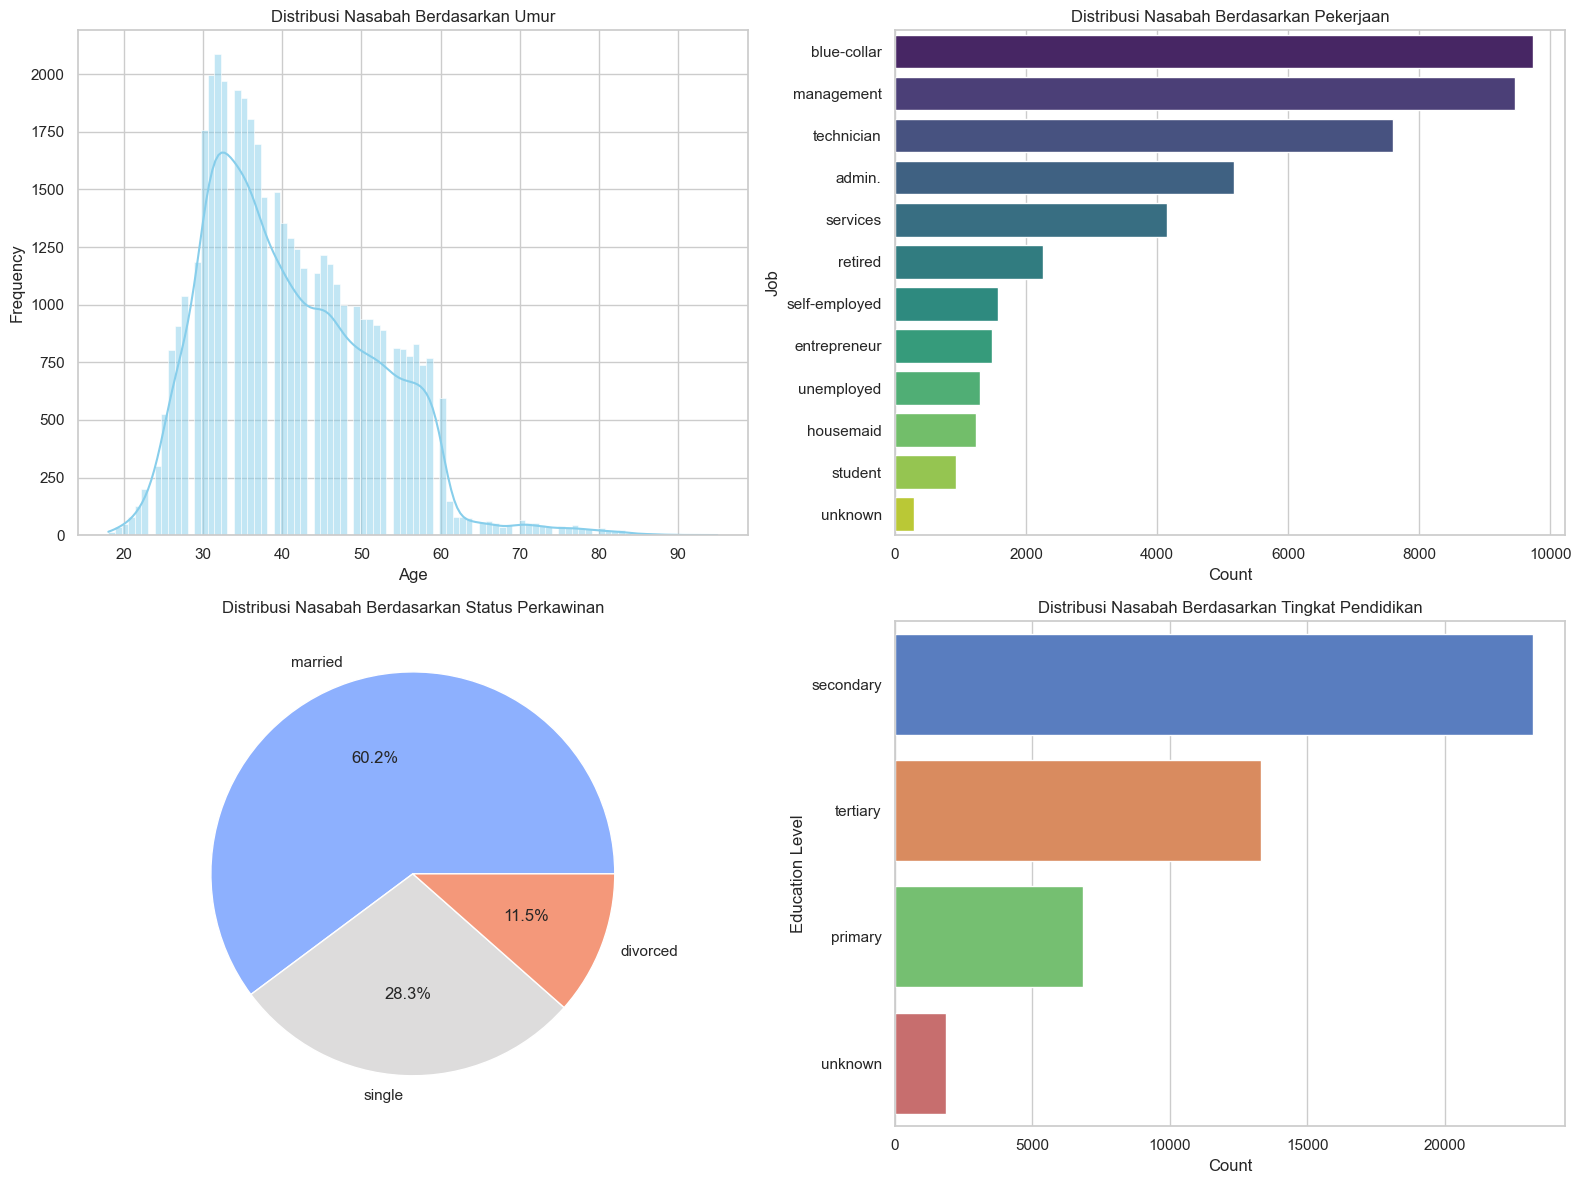

In [336]:
# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribusi kolom Age
sns.histplot(dfa['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Nasabah Berdasarkan Umur')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Distribusi kolom Job
sns.countplot(y=dfa['job'], order=dfa['job'].value_counts().index, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribusi Nasabah Berdasarkan Pekerjaan')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job')

# Distribusi kolom Marital Status (Pie Chart)
marital_counts = dfa['marital'].value_counts()
axes[1, 0].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(marital_counts)))
axes[1, 0].set_title('Distribusi Nasabah Berdasarkan Status Perkawinan')

# Distribusi kolom Education
sns.countplot(y=dfa['education'], order=dfa['education'].value_counts().index, ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Distribusi Nasabah Berdasarkan Tingkat Pendidikan')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')


# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi nasabah yang ditampilkan di atas, berikut adalah penjelasan mengenai distribusi nasabah berdasarkan faktor demografi:

1. Distribusi Nasabah Berdasarkan Umur:
   - Distribusi umur nasabah menunjukkan pola yang mirip dengan distribusi normal yang miring ke kanan, dengan puncak di usia sekitar 30 tahun.
   - Sebagian besar nasabah berada dalam rentang usia 25 sampai 60 tahun, dengan jumlah nasabah tertinggi pada rentang usia 30-35 tahun.
   - Jumlah nasabah berkurang drastis setelah usia 60 tahun, yang menunjukkan lebih sedikit nasabah yang berusia lanjut.

2. Distribusi Nasabah Berdasarkan Pekerjaan:
   - Pekerjaan paling umum di antara nasabah adalah "blue-collar", diikuti oleh "management" dan "technician".
   - Pekerjaan seperti "admin.", "services", dan "retired" juga cukup banyak diwakili, sementara pekerjaan seperti "student" dan "housemaid" memiliki jumlah nasabah yang relatif lebih sedikit.
   - Kategori "unknown" juga muncul, yang menunjukkan ada sejumlah nasabah dengan pekerjaan yang tidak diketahui atau tidak dispesifikasikan.

3. Distribusi Nasabah Berdasarkan Status Perkawinan:
   - Sebagian besar nasabah adalah "married" (menikah), diikuti oleh "single" (belum menikah), dan kemudian "divorced" (bercerai).
   - Jumlah nasabah yang menikah jauh lebih banyak dibandingkan dengan nasabah yang belum menikah atau bercerai, menunjukkan kemungkinan dominasi nasabah yang lebih tua atau mapan.

4. Distribusi Nasabah Berdasarkan Tingkat Pendidikan:
   - Tingkat pendidikan "secondary" (menengah) mendominasi, diikuti oleh "tertiary" (tinggi) dan "primary" (dasar).
   - Ada juga sejumlah kecil nasabah dengan pendidikan yang tidak diketahui ("unknown").
   - Dominasi tingkat pendidikan menengah menunjukkan bahwa sebagian besar nasabah mungkin memiliki latar belakang pendidikan yang tidak terlalu tinggi.


## **Korelasi antara Faktor Demografis dengan Keputusan Berlangganan (Statistika Inferensial)**

1. Uji Kendall tau (age dan y):
    - H0: Tidak terdapat korelasi yang signifikan antara umur (age) dan keputusan berlangganan deposito (y).
    - H1: Terdapat korelasi yang signifikan antara umur (age) dan keputusan berlangganan deposito (y).
    - Jika p-value < 0.05, kita menolak H0, yang berarti ada korelasi signifikan antara umur dan keputusan berlangganan deposito.

2. Uji Chi-Square (job, marital, education, dan y):
    - H0: Tidak terdapat hubungan yang signifikan antara variabel demografis (misalnya job, marital, education) dan keputusan berlangganan deposito (y).
    - H1: Terdapat hubungan yang signifikan antara variabel demografis (misalnya job, marital, education) dan keputusan berlangganan deposito (y).
    - Jika p-value < 0.05, kita menolak H0, yang berarti ada hubungan signifikan antara variabel demografis dan keputusan berlangganan deposito.

In [337]:
# Uji Korelasi Kendall tau untuk age dan y
correlation, p_value = kendalltau(df['age'], df['y'])
print("Hasil Uji Korelasi Kendall tau untuk age dan y:")
print(f"Kendall's tau correlation: {correlation}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Kesimpulan: Tolak H0, terdapat korelasi yang signifikan antara umur dan keputusan berlangganan deposito.\n")
else:
    print("Kesimpulan: Terima H0, tidak terdapat korelasi yang signifikan antara umur dan keputusan berlangganan deposito.\n")

# Uji Chi-Square untuk job, marital, dan education
for column in ['job', 'marital', 'education']:
    contingency_table = pd.crosstab(df[column], df['y'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    print(f"Hasil Uji Chi-Square untuk {column} dan y:")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print(f"Kesimpulan: Tolak H0, terdapat hubungan yang signifikan antara {column} dan keputusan berlangganan deposito.\n")
    else:
        print(f"Kesimpulan: Terima H0, tidak terdapat hubungan yang signifikan antara {column} dan keputusan berlangganan deposito.\n")


Hasil Uji Korelasi Kendall tau untuk age dan y:
Kendall's tau correlation: -0.007245853444001888
P-value: 0.06281783090784109
Kesimpulan: Terima H0, tidak terdapat korelasi yang signifikan antara umur dan keputusan berlangganan deposito.

Hasil Uji Chi-Square untuk job dan y:
Chi2: 836.1054877471965
P-value: 3.337121944935502e-172
Kesimpulan: Tolak H0, terdapat hubungan yang signifikan antara job dan keputusan berlangganan deposito.

Hasil Uji Chi-Square untuk marital dan y:
Chi2: 196.49594565603957
P-value: 2.1450999986791792e-43
Kesimpulan: Tolak H0, terdapat hubungan yang signifikan antara marital dan keputusan berlangganan deposito.

Hasil Uji Chi-Square untuk education dan y:
Chi2: 238.92350616407606
P-value: 1.6266562124072994e-51
Kesimpulan: Tolak H0, terdapat hubungan yang signifikan antara education dan keputusan berlangganan deposito.



Berdasarkan hasil uji korelasi faktor demografi pada kolom age, job, marital, education dengan keputusan berlangganan (y) :
- Umur (age) tidak memiliki korelasi signifikan dengan keputusan berlangganan deposito.
- Pekerjaan (job), status perkawinan (marital), dan tingkat pendidikan (education) memiliki hubungan yang signifikan dengan keputusan berlangganan deposito. Ini berarti bahwa faktor-faktor demografis tersebut mungkin mempengaruhi keputusan seseorang untuk berlangganan deposito.

## **Performa Kampanye Pemasaran Sebelumnya berdasarkan Riwayat Berlangganan**

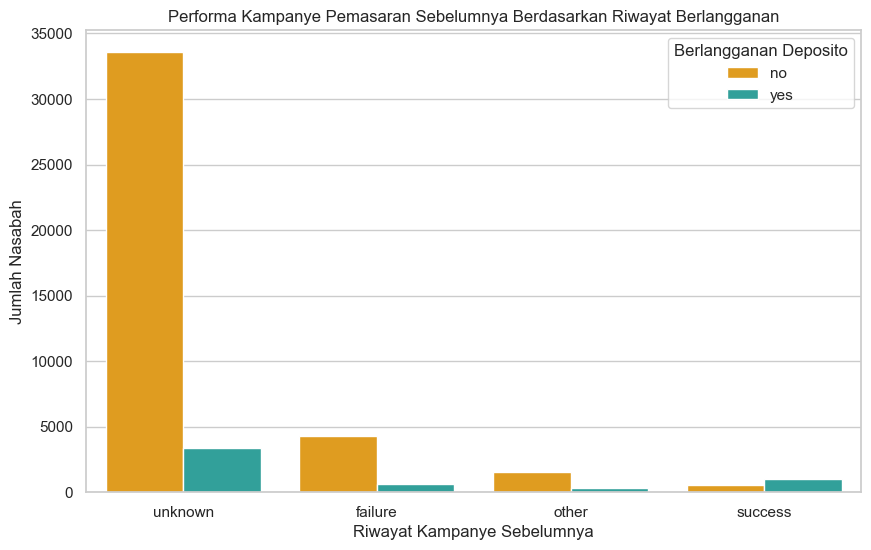

In [338]:
# Membuat plot
plt.figure(figsize=(10, 6))

# Menentukan warna manual untuk hue (keputusan)
custom_palette = {'no': 'orange', 'yes': 'lightseagreen'}

sns.countplot(data=dfa, x='poutcome', hue='y', palette=custom_palette)
plt.title('Performa Kampanye Pemasaran Sebelumnya Berdasarkan Riwayat Berlangganan')
plt.xlabel('Riwayat Kampanye Sebelumnya')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Berlangganan Deposito', loc='upper right')
plt.show()

Visualisasi yang ditampilkan menunjukkan performa kampanye pemasaran sebelumnya berdasarkan riwayat transaksi pelanggan yang terbagi dalam empat kategori:
- Unknown: Riwayat kampanye sebelumnya tidak diketahui.
- Failure: Kampanye sebelumnya tidak berhasil.
- Other: Riwayat kampanye lainnya yang tidak masuk ke dalam kategori "success" atau "failure".
- Success: Kampanye sebelumnya berhasil.

Visualisasi menunjukkan jumlah nasabah berdasarkan riwayat kampanye tersebut serta keputusan mereka apakah berlangganan deposito (yes) atau tidak (no):
1. Kategori unknown memiliki jumlah nasabah paling banyak, tetapi sebagian besar dari mereka tidak berlangganan deposito (no). Ini mungkin mengindikasikan bahwa data riwayat kampanye sebelumnya tidak tercatat atau kampanye tersebut tidak dijalankan pada nasabah tersebut.
2. Kategori failure menunjukkan bahwa meskipun ada beberapa nasabah yang tidak berlangganan deposito setelah kampanye dan sebelumnya gagal, ada juga yang tetap berlangganan.
3. Kategori other menunjukkan jumlah nasabah yang relatif kecil, dengan lebih banyak nasabah yang tidak berlangganan dibandingkan yang berlangganan.
4. Kategori success menunjukkan bahwa meskipun jumlah nasabah di kategori ini lebih kecil, rasio berlangganan (yes) lebih tinggi dibandingkan kategori lainnya. Ini menunjukkan bahwa jika kampanye sebelumnya sukses, kemungkinan nasabah tersebut untuk berlangganan deposito lebih tinggi.

## **Rata-rata Saldo berdasarkan Tingkat Pendidikan**

In [340]:
# Menghitung rata-rata saldo untuk setiap kategori pendidikan
education_balance = dfa.groupby('education')['balance'].mean().reset_index()

# Menghitung frekuensi untuk setiap kategori pendidikan
education_counts = dfa['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Menggabungkan rata-rata saldo dan frekuensi
education_summary = pd.merge(education_balance, education_counts, on='education')

# Daftar warna
colors = ['orange', 'blue', 'yellow', 'purple']

# Membuat bubble chart menggunakan Plotly
fig = px.scatter(
    education_summary, 
    x='education', 
    y='balance', 
    size='count', 
    color='education', 
    size_max=300,  # Ukuran maksimum bubble
    hover_name='education', 
    title='Rata-rata Saldo berdasarkan Tingkat Pendidikan',
    color_discrete_sequence=colors
)

# Menampilkan plot dengan ukuran yang serupa dengan Matplotlib
fig.update_layout(
    width=900,
    height=600,
    xaxis_title="Tingkat Pendidikan",
    yaxis_title="Rata-rata Saldo",
    title_font_size=18
)

# Menampilkan plot interaktif
fig.show()


Berdasarkan hasil visualisasi rata-rata saldo berdasarkan tingkat pendidikan, ditemukan:

1. **Primary (Pendidikan Dasar)**:
   - Rata-rata saldo: Sekitar 1250.95.
   - Ukuran bubble: Relatif kecil dibandingkan kategori lain, menunjukkan bahwa jumlah nasabah dengan tingkat pendidikan ini lebih sedikit.

2. **Secondary (Pendidikan Menengah)**:
   - Rata-rata saldo: Sedikit di atas 1154.881.
   - Ukuran bubble: Ukurannya lebih besar dari primary, menunjukkan bahwa kategori ini memiliki lebih banyak nasabah.

3. **Tertiary (Pendidikan Tinggi)**:
   - Rata-rata saldo: Tertinggi, berada di sekitar 1758.416.
   - Ukuran bubble: Terbesar, menunjukkan bahwa nasabah dengan pendidikan tinggi tidak hanya memiliki saldo rata-rata yang lebih besar tetapi juga jumlah yang lebih banyak.

4. **Unknown (Tidak Diketahui)**:
   - Rata-rata saldo: Sekitar 1526.754.
   - Ukuran bubble: Lebih kecil dibandingkan dengan kategori lain, menunjukkan bahwa jumlah nasabah dengan tingkat pendidikan yang tidak diketahui adalah yang paling sedikit.

**Kesimpulan:**
- Nasabah dengan pendidikan tinggi (tertiary) memiliki rata-rata saldo tertinggi dibandingkan dengan nasabah di tingkat pendidikan lainnya. Selain itu, kategori pendidikan ini juga memiliki jumlah nasabah yang lebih banyak setelah nasabah dengan pendidikan menengah (secondary).
- Nasabah dengan pendidikan dasar (primary) memiliki rata-rata saldo yang sedikit lebih tinggi daripada secondary, namun jumlahnya lebih sedikit.
- Nasabah dengan pendidikan yang tidak diketahui (unknown) memiliki nasabah terendah. Dengan rata-rata saldo lebih tinggi dari nasabah tingkat pendidikan primary dan secondary.
- Bubble chart ini memberi pemahaman visual bahwa tingkat pendidikan tampaknya memiliki hubungan dengan jumlah nasabah dan saldo rata-rata.

## **Pola Musiman dalam Keputusan Berlangganan Deposito (bulan)**

In [341]:
dfa.query('month == "may"')[['y']].value_counts()

y  
no     12841
yes      925
Name: count, dtype: int64

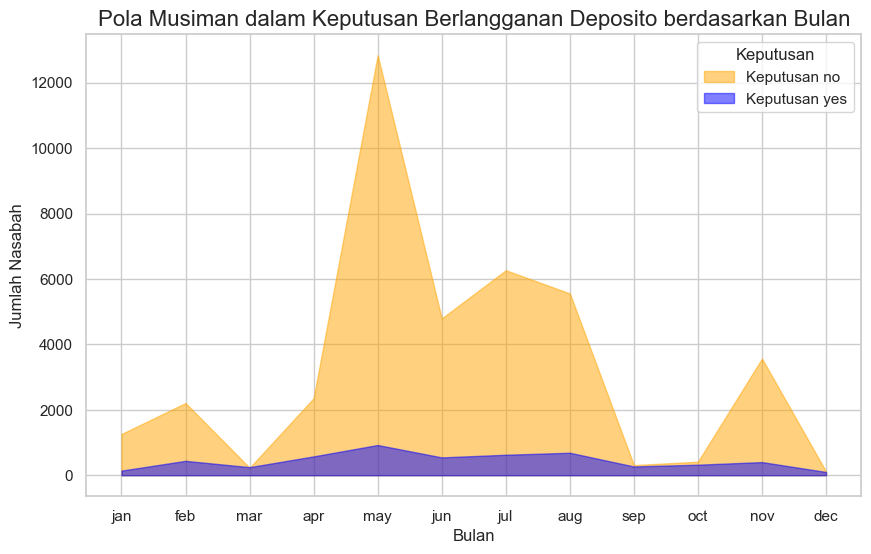

In [342]:
# Mengurutkan bulan sesuai urutan waktu
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Membuat tabel pivot untuk menghitung jumlah nasabah berdasarkan bulan dan keputusan
dfa_pivot = dfa.groupby(['month', 'y']).size().unstack(fill_value=0)

# Mengurutkan bulan sesuai urutan waktu
dfa_pivot = dfa_pivot.reindex(month_order)

# Membuat visualisasi pola musiman dengan area chart
plt.figure(figsize=(10, 6))

# Warna untuk kategori
colors = ['orange', 'blue']

# Membuat area chart dengan warna tertentu
for i, column in enumerate(dfa_pivot.columns):
    plt.fill_between(dfa_pivot.index, dfa_pivot[column], alpha=0.5, color=colors[i], label=f'Keputusan {column}')

# Menambahkan judul dan label sumbu
plt.title('Pola Musiman dalam Keputusan Berlangganan Deposito berdasarkan Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)

# Menampilkan legend
plt.legend(title='Keputusan')

# Menampilkan plot
plt.show()

Visualisasi pola musiman dalam keputusan berlangganan deposito berdasarkan bulan, ditemukan ;

**Penjelasan:**
1. **Musim Puncak (Mei hingga Juni)**:
   - Pada bulan Mei, jumlah nasabah yang dihubungi melonjak secara drastis dengan lebih dari 12.000 nasabah yang tidak berlangganan (ditandai oleh area oranye yang besar). 
   - Keputusan "yes" untuk berlangganan tetap relatif rendah meskipun ada lonjakan kontak. Ini menunjukkan bahwa meskipun ada peningkatan upaya kampanye, tingkat keberhasilan tetap kecil.

2. **Fluktuasi pada Bulan April dan Juni**:
   - Sebelum bulan Mei, ada peningkatan dalam jumlah nasabah yang dihubungi pada bulan April, dan kemudian terjadi penurunan setelah bulan Juni. 
   - Setelah puncak kampanye, jumlah nasabah yang dihubungi menurun secara signifikan dari bulan Juni hingga Agustus.

3. **Bulan Stabil dengan Aktivitas Rendah (Januari hingga Maret, Agustus hingga Desember)**:
   - Aktivitas kampanye pada bulan-bulan ini terlihat jauh lebih rendah dengan jumlah nasabah yang dihubungi lebih sedikit. Keputusan untuk berlangganan maupun tidak berlangganan tampaknya stabil dan rendah.
   - Bulan Oktober menunjukkan sedikit peningkatan dibandingkan bulan-bulan lain, meskipun jauh lebih rendah dibandingkan dengan puncak pada bulan Mei.

4. **Bulan dengan Aktivitas Kampanye Rendah (Februari, Agustus, September, November)**:
   - Pada bulan-bulan ini, aktivitas kampanye tampaknya paling rendah dengan jumlah kontak yang minim dan sedikit keputusan yang dibuat.

**Kesimpulan:**
- Pola Musiman: Aktivitas kampanye tampaknya paling intens pada musim semi, khususnya pada bulan Mei, dengan penurunan yang signifikan pada musim panas dan awal musim gugur.
- Efektivitas Kampanye: Meskipun ada peningkatan besar dalam jumlah nasabah yang dihubungi pada bulan Mei, keputusan untuk berlangganan tetap rendah sepanjang tahun, mengindikasikan bahwa jumlah kontak yang lebih tinggi tidak selalu menghasilkan konversi yang lebih tinggi.
- Saran Strategi: Perusahaan dapat mengevaluasi efektivitas kampanye mereka pada bulan-bulan dengan kontak tinggi seperti Mei dan mencari cara untuk meningkatkan tingkat keberhasilan, atau mereka dapat mempertimbangkan untuk merancang kampanye yang lebih efektif selama periode yang lebih tenang untuk meningkatkan konversi.

## **Pengaruh Durasi Kontak Terhadap Keberhasilan Kampanye (Statistika Deskriptif)**

In [343]:
# Menghitung statistika deskriptif untuk durasi kontak berdasarkan hasil kampanye
duration_descriptive_stats = dfa.groupby('y')['duration'].describe()

# Menampilkan hasil
duration_descriptive_stats


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


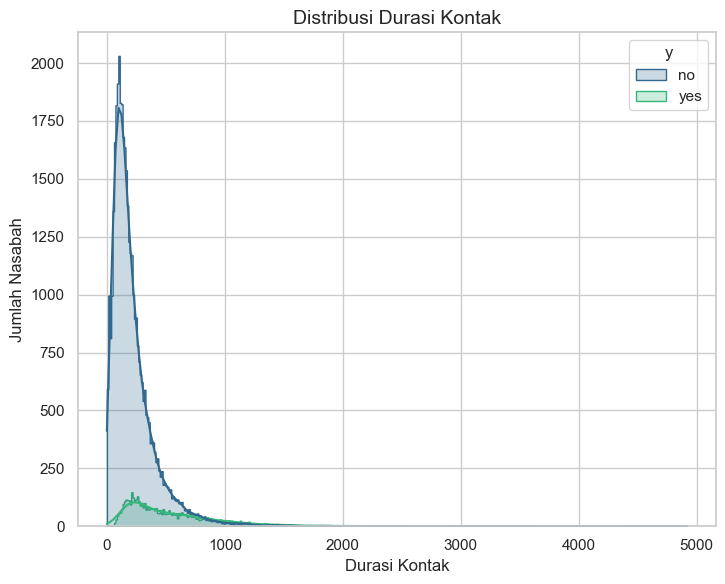

In [344]:
# Membuat figure dan axes
plt.figure(figsize=(14, 6))

# Histogram untuk distribusi durasi kontak
plt.subplot(1, 2, 2)
sns.histplot(data=dfa, x='duration', hue='y', element='step', palette='viridis', kde=True)
plt.title('Distribusi Durasi Kontak', fontsize=14)
plt.xlabel('Durasi Kontak', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Dari hasil output dan visualisasi diatas, ditemukan:

1. Kelompok "no" memiliki jumlah sampel yang jauh lebih besar (39922) dibandingkan kelompok "yes" (5289).
2. Rata-rata durasi kontak untuk kelompok "yes" (537.2945) lebih tinggi daripada kelompok "no" (221.1828).
3. Kedua kelompok memiliki variabilitas yang tinggi, terlihat dari standar deviasi yang besar.
4. Distribusi kedua kelompok cenderung miring ke kanan (right-skewed), dengan banyak kontak berdurasi pendek dan sedikit kontak berdurasi sangat panjang.
5. Kelompok "yes" cenderung memiliki durasi kontak yang lebih lama di semua kuartil dibandingkan kelompok "no". Ini menunjukkan bahwa kontak yang berakhir dengan "yes" (mungkin kesuksesan kampanye) cenderung memiliki durasi yang lebih lama dibandingkan yang berakhir dengan "no".

## **Kinerja Kampanye berdasarkan Jumlah Kontak**

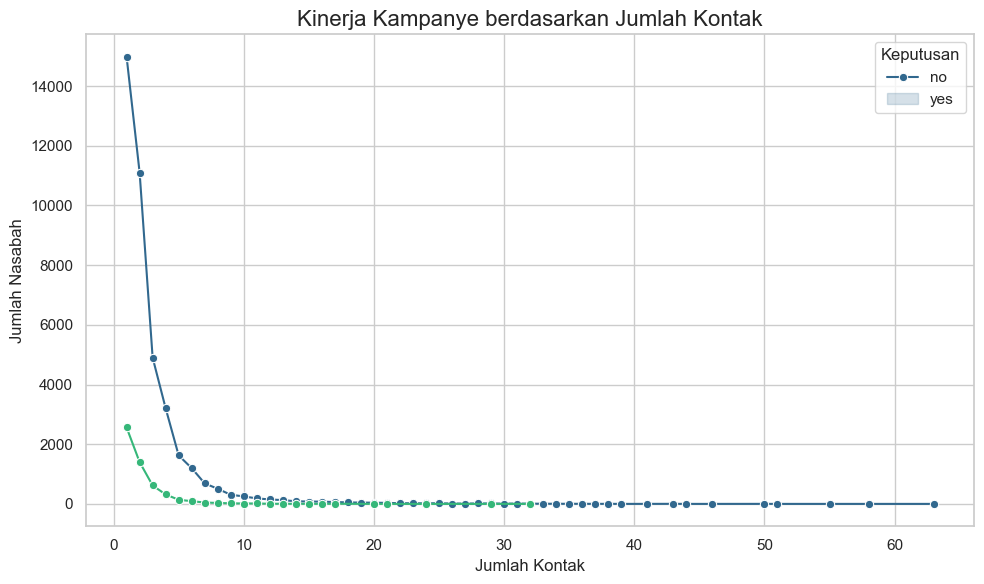

In [345]:
# Menghitung rata-rata jumlah kontak per hasil kampanye dan mengelompokkan datanya
contact_avg = dfa.groupby(['campaign', 'y']).size().reset_index(name='count')

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat lineplot untuk distribusi jumlah kontak berdasarkan hasil kampanye
sns.lineplot(data=contact_avg, x='campaign', y='count', hue='y', marker='o', palette='viridis')
# sns.histplot(data=dfa, x='campaign', hue='y', element='step', palette='viridis', kde=True)

# Menambahkan judul dan label sumbu
plt.title('Kinerja Kampanye berdasarkan Jumlah Kontak', fontsize=16)
plt.xlabel('Jumlah Kontak', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.legend(title='Keputusan', labels=['no', 'yes'])

# Menampilkan plot
plt.tight_layout()
plt.show()


Visualisasi kinerja kampanye berdasarkan jumlah kontak dengan nasabah, ditemukan :
1. Tren:
   - Jumlah nasabah tertinggi berada pada 0-5 kontak, dengan puncaknya di sekitar 15000 nasabah untuk kontak pertama.
   - Seiring bertambahnya jumlah kontak, jumlah nasabah menurun drastis.
   - Setelah sekitar 10 kontak, jumlah nasabah menjadi sangat rendah dan relatif stabil.

2. Perbandingan "yes" vs "no":
   - Keputusan "no" secara konsisten lebih tinggi dibandingkan "yes".
   - Area "yes" terlihat sangat kecil dibandingkan dengan garis "no", menunjukkan tingkat konversi yang relatif rendah.

3. Efektivitas:
   - Kampanye tampaknya paling efektif pada kontak-kontak awal (0-5 kontak).
   - Setelah sekitar 10 kontak, efektivitas menurun signifikan, ditunjukkan oleh jumlah nasabah yang sangat rendah.

---

# **Feature Engineering**

Proses penyiapan data untuk proses pelatihan model, meliputi periksa duplikat data, splitting, handling missing value, handling outlier, periksa kardinalitas, dan feature selection.

In [346]:
# Menyalin dataset asli
dfe = df.copy()
dfe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## **Check Duplicate**

In [347]:
# Memeriksa dupllikasi
dfe.duplicated().sum()

0

Dataset Bank Telemarketing tidak memiliki data duplikat.

## **Splitting Data Train-Set, Test-Set dan Inference-Set**

Split data untuk train set, test set, dan inference set

In [348]:
# Split data untuk fitur dan target
X = dfe.drop(columns='y') #untuk feature
y = dfe['y'] #untuk target

# Pisahkan inference set terlebih dahulu dari total dataset
X_temp, X_inference, y_temp, y_inference = train_test_split(X,
                                                            y,
                                                            test_size=0.0001,  # Sebagian kecil data untuk inference
                                                            stratify=y,
                                                            random_state=11)

# Split data untuk train set dan test set dari data yang tersisa (X_temp dan y_temp)
X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                    y_temp,
                                                    test_size=0.2,  # 20% dari data yang tersisa untuk test
                                                    stratify=y_temp,
                                                    random_state=11)

# Cek ukuran dari setiap set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran X_inference:", X_inference.shape)

Ukuran X_train: (36164, 16)
Ukuran X_test: (9042, 16)
Ukuran X_inference: (5, 16)


## **Handling Missing Value**

Memeriksa dan menangani missing value pada data.

In [349]:
# Memeriksa Missing Value pada X_train
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [350]:
# Memeriksa Missing Value pada X_test
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [351]:
# Memeriksa Missing Value pada X_inference
X_inference.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Dari ketiga set data yang sudah di splitting tidak memiliki nilai (NaN) Missing Value.

In [352]:
# Fungsi mencari nilai unik
def check_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f'Kolom: {column}')
        print(f'Jumlah nilai unik: {len(unique_values)}')
        print(f'Nilai unik: {unique_values}\n')


Memeriksa unik value menggunakan data X_train untuk mewakili set data lain yang sudah di splitting.

In [353]:
# Menampilkan nilai unik
check_unique_values(X_train)

Kolom: age
Jumlah nilai unik: 76
Nilai unik: [40 36 26 42 34 39 33 45 32 48 28 38 51 46 43 23 30 27 54 49 50 31 52 37
 53 35 55 57 44 56 47 41 25 75 58 61 63 24 59 29 22 60 62 69 66 21 77 82
 68 76 83 67 81 70 65 71 20 73 72 80 84 19 64 74 86 89 78 18 95 94 79 93
 87 85 92 90]

Kolom: job
Jumlah nilai unik: 12
Nilai unik: ['management' 'blue-collar' 'admin.' 'technician' 'services' 'retired'
 'unemployed' 'student' 'unknown' 'entrepreneur' 'self-employed'
 'housemaid']

Kolom: marital
Jumlah nilai unik: 3
Nilai unik: ['married' 'single' 'divorced']

Kolom: education
Jumlah nilai unik: 4
Nilai unik: ['tertiary' 'secondary' 'primary' 'unknown']

Kolom: default
Jumlah nilai unik: 2
Nilai unik: ['no' 'yes']

Kolom: balance
Jumlah nilai unik: 6585
Nilai unik: [ 229   56  786 ... 1302 4084 5891]

Kolom: housing
Jumlah nilai unik: 2
Nilai unik: ['yes' 'no']

Kolom: loan
Jumlah nilai unik: 2
Nilai unik: ['no' 'yes']

Kolom: contact
Jumlah nilai unik: 3
Nilai unik: ['cellular' 'unknown' 'teleph

Hasil nilai unik di atas, pada beberapa kolom masih memiliki nilai unknown yang perlu di identifikasi lebih lanjut. Seperti pada kolom :
- job
- education
- contact
- poutcome


In [354]:
# Memeriksa nilai unknown pada kolom job
X_train['job'].value_counts()

job
blue-collar      7818
management       7576
technician       6017
admin.           4126
services         3362
retired          1798
self-employed    1263
entrepreneur     1174
unemployed       1058
housemaid        1004
student           742
unknown           226
Name: count, dtype: int64

 Jumlah "unknown" pada kolom job tidak memiliki proporsi yang banyak. Nilai "unknown" pada kolom job terjadi dapat disebabkan hal lain. Hal ini dapat diperiksa apakah ada pola yang terkait dengan "unknown" di kolom lain (misalnya, kategori umur, tingkat pendidikan atau status pernikahan). 


In [355]:
# Memeriksa pola hubungan kolom job
X_train.query('job == "unknown"')[['age','marital','education']].value_counts()

age  marital   education
47   married   unknown      10
46   married   unknown       7
56   married   unknown       5
50   married   unknown       4
53   married   unknown       4
                            ..
41   single    secondary     1
               primary       1
     married   unknown       1
               primary       1
82   divorced  unknown       1
Name: count, Length: 135, dtype: int64

Hasil value "unknown" pada kolom job diatas, tidak terlihat adanya pola yang berhubungan dengan kolom (age, marital, dan education). Nilai "unknown" kemungkinan terjadi karena informasi pekerjaan tersebut tidak berhasil dikumpulkan atau dicatat pada saat data diambil diluar value unik yang lain. Hal ini bisa terjadi karena responden tidak memberikan informasi, atau karena ada kesalahan dalam proses pengumpulan data. Oleh karena itu, nilai **"unknown"** pada kolom job dapat **diabaikan.**

In [356]:
# Memeriksa nilai unknown pada kolom education
X_train['education'].value_counts()

education
secondary    18577
tertiary     10645
primary       5483
unknown       1459
Name: count, dtype: int64

Jumlah nilai "unknown" pada kolom education juga memiliki proporsi yang paling sedikit diantara kategori lain di kolom tersebut. Selanjutnya, dapat diperiksa terlebih dahulu apakah terdapat pola atau hubungan pada kolom lain (age, marital, job).

In [357]:
# Memeriksa pola hubungan kolom education
X_train.query('education == "unknown"')[['age','marital','job']].value_counts()

age  marital   job         
36   married   blue-collar     16
47   married   blue-collar     14
45   married   blue-collar     14
42   married   blue-collar     13
37   married   blue-collar     13
                               ..
49   divorced  housemaid        1
               entrepreneur     1
               blue-collar      1
48   single    unemployed       1
33   married   management       1
Name: count, Length: 586, dtype: int64

Hasil value "unknown" pada kolom education dengan kolom (age, marital, job) tidak ada pola yang ditemukan. Nilai "unknown" pada kolom education dapat terjadi karena, nasabah menolak memberikan informasi tersebut atau karena tidak diminta pada saat itu sehingga data tidak tersedia. Selain itu, tingkat pendidikan bisa dianggap tidak relevan untuk beberapa jenis nasabah, terutama jika hubungan nasabah dengan bank lebih terkait dengan produk atau layanan yang tidak memerlukan informasi pendidikan. Namun, ada kemungkinan terjadi kesalahan teknis atau administratif dalam sistem pengumpulan dan penyimpanan data menyebabkan beberapa data kehilangan nilai pendidikan. Oleh karena itu, nilai **"unknown"** pada kolom education dapat **diabaikan**.

In [358]:
# Memeriksa nilai unknown pada kolom contact
X_train['contact'].value_counts()

contact
cellular     23432
unknown      10407
telephone     2325
Name: count, dtype: int64

Kolom contact merujuk pada jenis komunikasi yang digunakan oleh pihak marketing bank untuk menghubungi klien selama kampanye pemasaran, bukan data jenis komunikasi dari nasabah. Jenis komunikasi ini biasanya mencakup opsi seperti "cellular" (ponsel) atau "telephone" (telepon rumah). Nilai "unknown" pada kolom contact memiliki proporsi yang lebih banyak dari kategori yang ada. Oleh karena itu, nilai "unknown" pada kolom contact perlu di*handling*.
Kolom contact yang memiliki nilai "unknown" dapat terjadi karena data yang tidak tersedia atau tidak tercatat saat kampanye dilakukan.
Penanganan nilai "unknown" pada kolom contact dapat dilakukan dengan **imputasi**. Karena kolom contact merupakan data kategori, imputasi yang dilakukan adalah mengganti nilai "unknown" dengan data yang paling sering muncul (modus) pada kolom tersebut.


In [359]:
# Daftar data split yang akan diproses
data_split = [X_train, X_test, X_inference]

# Loop untuk memproses setiap data split
for df in data_split:
    # Mengubah "unknown" menjadi NaN
    df['contact'] = df['contact'].replace('unknown', np.nan)
    
    # Mengisi nilai NaN dengan modus dari masing-masing data split
    df['contact'] = df['contact'].fillna(df['contact'].mode()[0])

# Hasilnya disimpan di X_train, X_test, dan X_inference
print("X_train:\n", X_train['contact'].value_counts())
print("\nX_test:\n", X_test['contact'].value_counts())
print("\nX_inference:\n", X_inference['contact'].value_counts())

X_train:
 contact
cellular     33839
telephone     2325
Name: count, dtype: int64

X_test:
 contact
cellular     8461
telephone     581
Name: count, dtype: int64

X_inference:
 contact
cellular    5
Name: count, dtype: int64


Setelah melakukan imputasi dengan modus pada kolom contact, data yang unknown sebelumnya sudah diganti dengan kategori cellular. Lakukan handling unknown pada data test dan data inference.

In [360]:
# Memeriksa nilai unknown pada kolom poutcome
X_train['poutcome'].value_counts()

poutcome
unknown    29559
failure     3919
other       1487
success     1199
Name: count, dtype: int64

Kolom poutcome pada data Bank Telemarketing merupakan data hasil dari kampanye pemasaran sebelumnya. Proporsi nilai "unknown" jauh lebih banyak dari nilai kategori yang lain. Oleh karena itu, kolom poutcome perlu diidentifikasi dan dicari pola dengan kolom yang lain seperti (pdays dan previous) untuk menangani nilai "unknown" tersebut. 

In [361]:
# Memeriksa pola hubungan kolom poutcome
X_train.query('poutcome == "unknown"')[['pdays','previous']].value_counts()

pdays  previous
-1     0           29554
 98    1               1
 168   5               1
 188   2               1
 416   2               1
 528   7               1
Name: count, dtype: int64

Nilai "unknown" pada kolom poutcome banyak disebabkan oleh nilai pdays yang negatif (-1) dan previous yang bernilai 0, menandakan bahwa klien tersebut belum pernah dihubungi dalam kampanye sebelumnya. 

In [362]:
# Memeriksa pola hubungan kolom poutcome dari kolom pdays = -1
X_train.query('pdays == -1')[['poutcome','previous']].value_counts()

poutcome  previous
unknown   0           29554
Name: count, dtype: int64

Dari hasil diatas, jika nilai pdays adalah -1 (berarti belum pernah dihubungi sebelumnya), maka nilai poutcome selalu "unknown", dan nilai previous adalah 0. Untuk menangani nilai "unknown" pada kolom poutcome dapat dilakukan dengan mengganti nilai "unknown" dengan kategori lain. Seperti "not contacted before", karena tidak ada kampanye sebelumnya yang relevan.

In [363]:
# Daftar data split yang akan diproses
data_split = [X_train, X_test, X_inference]

# Loop untuk mengganti "unknown" menjadi "not contacted before" untuk baris dengan pdays = -1
for df in data_split:
    df.loc[(df['poutcome'] == 'unknown') & (df['pdays'] == -1), 'poutcome'] = 'not contacted before'

# Hasilnya disimpan di X_train, X_test, dan X_inference
print("X_train:\n", X_train.query('pdays == -1')[['poutcome', 'previous']].value_counts())
print("\nX_test:\n", X_test.query('pdays == -1')[['poutcome', 'previous']].value_counts())
print("\nX_inference:\n", X_inference.query('pdays == -1')[['poutcome', 'previous']].value_counts())

X_train:
 poutcome              previous
not contacted before  0           29554
Name: count, dtype: int64

X_test:
 poutcome              previous
not contacted before  0           7396
Name: count, dtype: int64

X_inference:
 poutcome              previous
not contacted before  0           4
Name: count, dtype: int64


Nilai "unknown" pada kolom poutcome berhasil diganti dengan "not contacted before" hanya untuk baris yang memiliki pdays = -1, karena kondisi ini mengindikasikan bahwa nasabah belum pernah dihubungi sebelumnya.
Pada Data split X_train, ada 29.554 baris yang memenuhi kondisi ini, di X_test ada 7.396 baris, dan di X_inference ada 4 baris.

In [364]:
X_train['poutcome'].value_counts()

poutcome
not contacted before    29554
failure                  3919
other                    1487
success                  1199
unknown                     5
Name: count, dtype: int64

Masih ada nilai "unknown" sebanyak 5 data. Nilai "unknown" yang tersisa masih ada karena mereka tidak memenuhi kondisi pdays = -1. Ini menunjukkan bahwa nasabah tersebut pernah dihubungi sebelumnya tetapi hasilnya tetap "unknown" (tidak diketahui).

## **Handling Outlier**

Memeriksa dan menangani outlier pada data Bank Telemarketing (hanya untuk data train saja).

In [365]:
# Memisahkan kolom  numerik
diskrit_cols = ['age','day','campaign','pdays','previous']
continous_cols = ['balance','duration']
num_cols = diskrit_cols + continous_cols

In [366]:
# Memeriksa outlier dari gambar

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Generating plots for: age


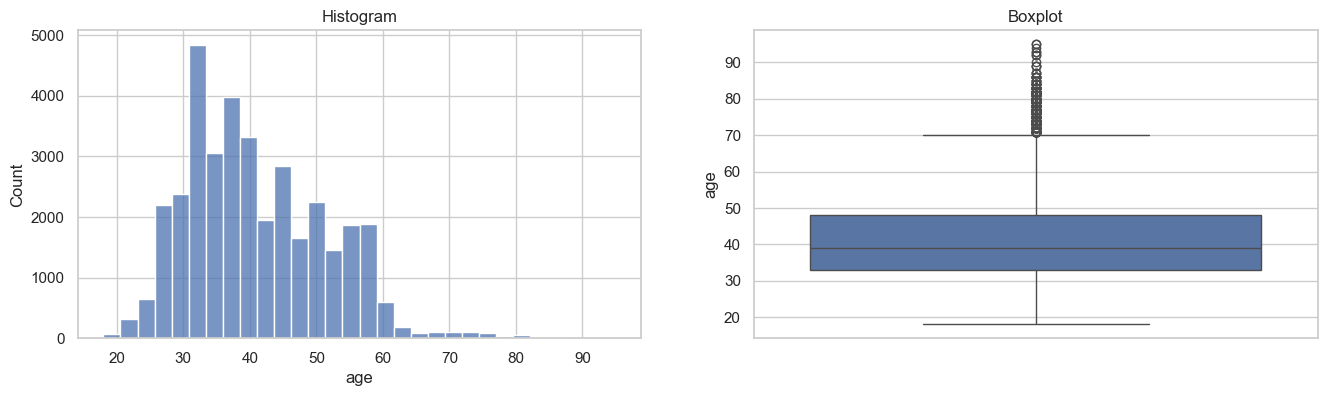

Generating plots for: day


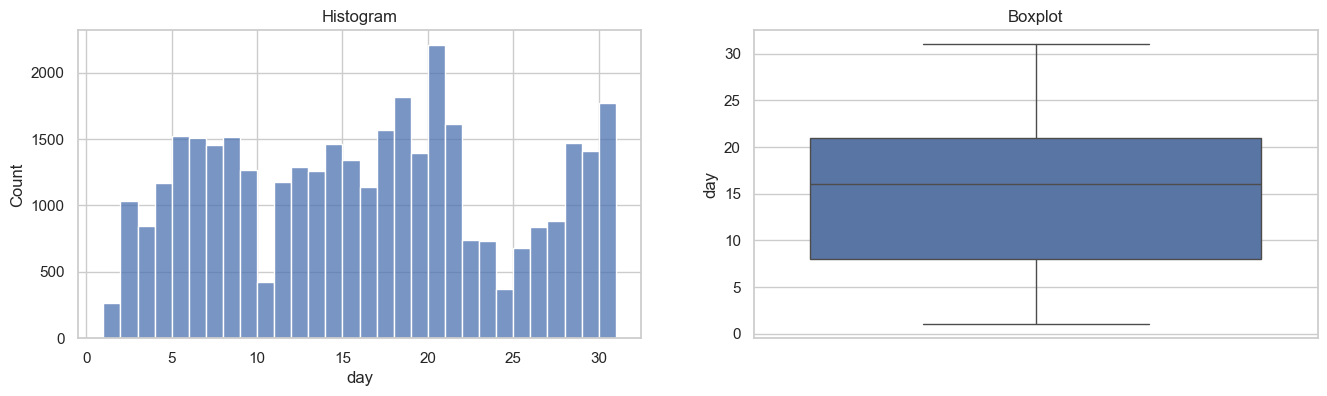

Generating plots for: campaign


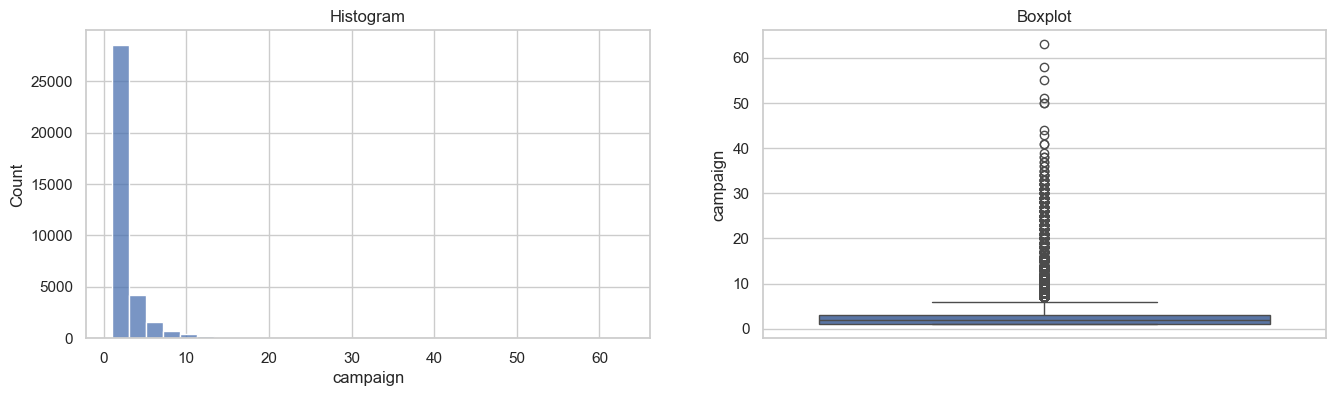

Generating plots for: pdays


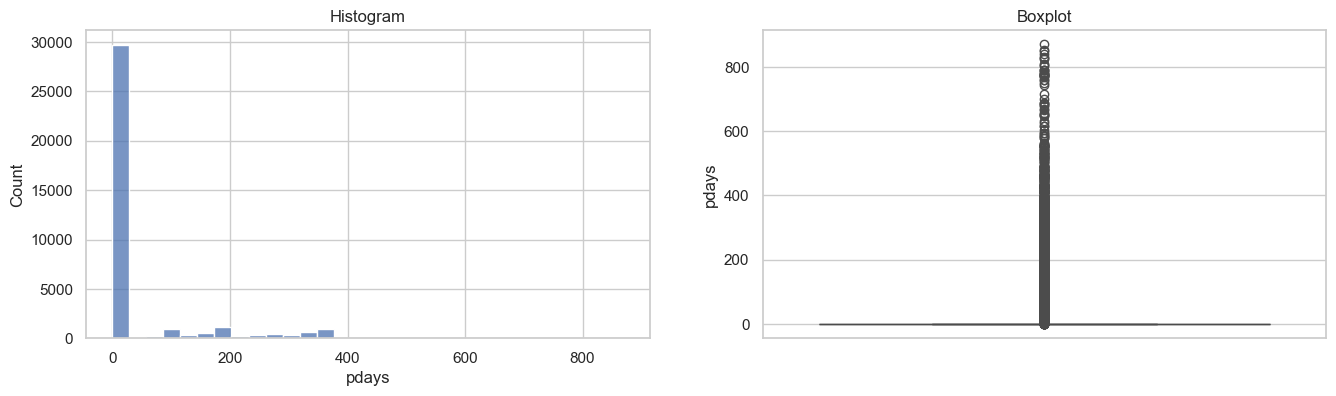

Generating plots for: previous


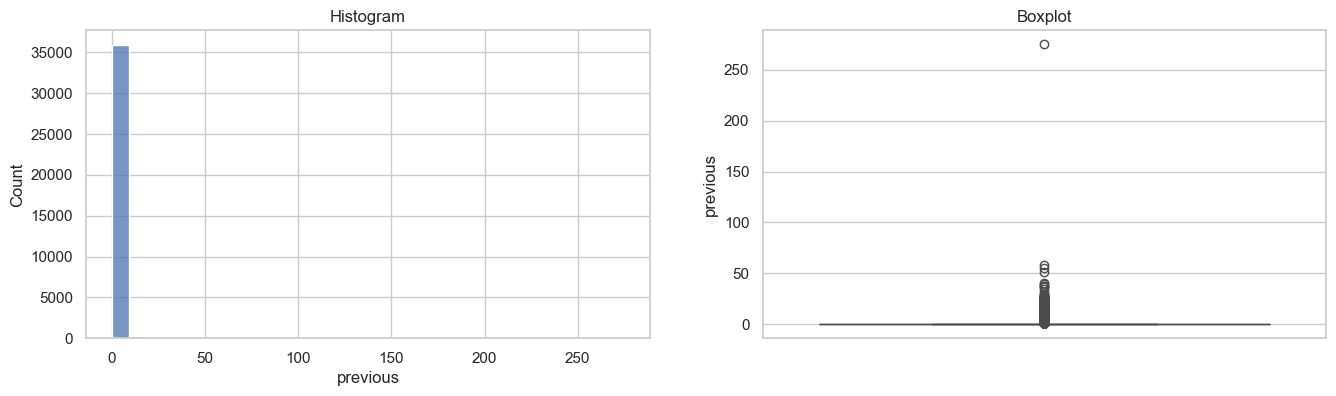

Generating plots for: balance


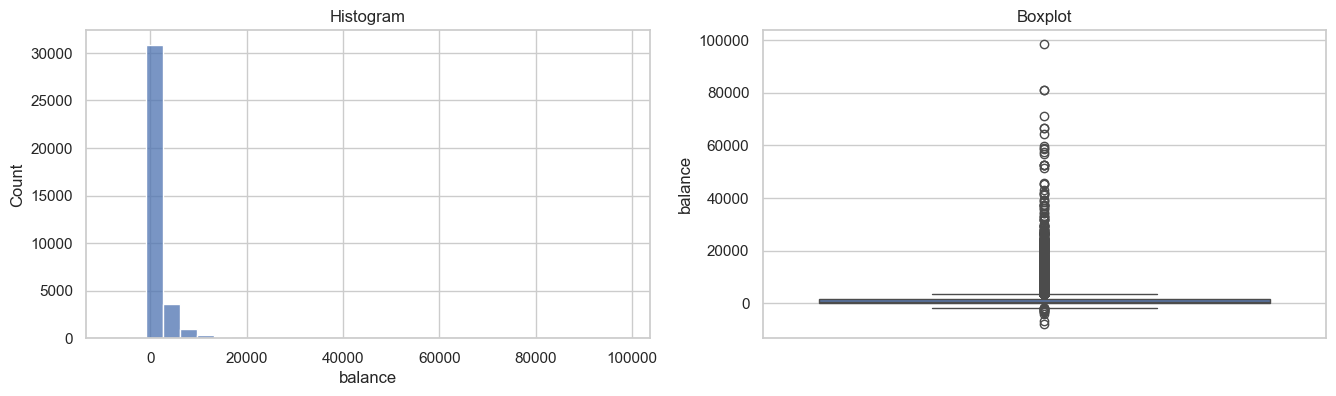

Generating plots for: duration


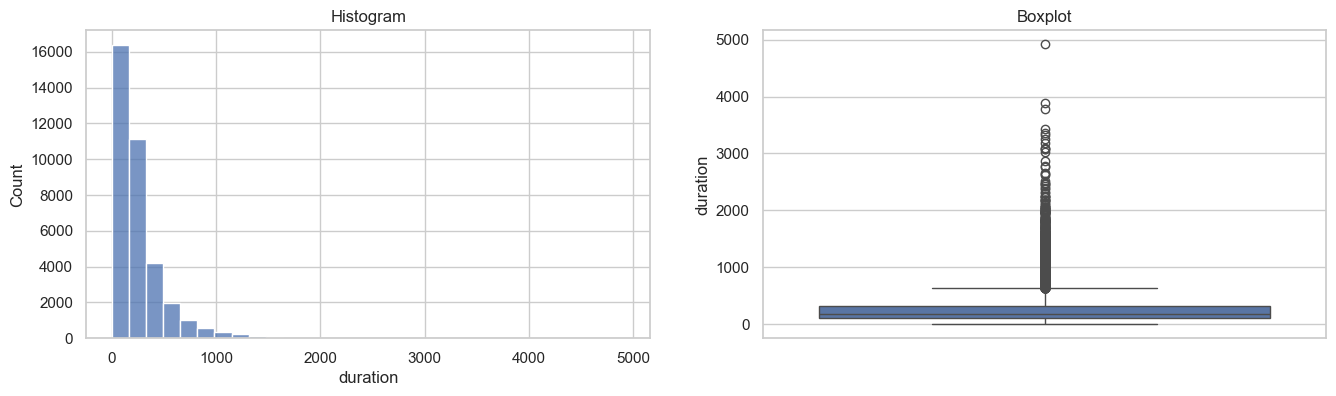

In [367]:
columns_to_plot = num_cols  # Tentukan kolom yang ingin di-plot

# Memanggil fungsi untuk kolom yang ditentukan
for column in columns_to_plot:
    # Periksa apakah kolom ada dalam DataFrame
    if column in X_train.columns:
        # Periksa apakah kolom bertipe numerik atau boolean
        if pd.api.types.is_numeric_dtype(X_train[column]) or pd.api.types.is_bool_dtype(X_train[column]):
            print(f'Generating plots for: {column}')
            diagnostic_plots(X_train, column)
        else:
            print(f'Kolom {column} bukan tipe numerik atau boolean. Skipping.')
    else:
        print(f'Kolom {column} tidak ditemukan dalam DataFrame.')

Berdasarkan gambar di atas, dari 7 kolom numerik hanya 1 kolom (day) yang tidak memiliki outlier serta memiliki distribusi data yang normal.

In [368]:
def check_outlier(df, num_cols):
    # List untuk menyimpan hasil dari setiap kolom
    results = []

    for column in num_cols:
        # Hitung skewness
        skewness = stats.skew(df[column])

        # Tentukan tingkat skewness
        if skewness <= 0.5 and skewness >= -0.5 :
            skewness_level = "Normal"
            capping_method = "Gaussian"
        elif skewness <= 1 and skewness >= -1:
            skewness_level = "Medium Skew"
            capping_method = "IQR/Percentile"
        else:
            skewness_level = "High Skew"
            capping_method = "IQR/Percentile"

        # Cari outlier menggunakan z-score jika data normal, Tukey jika data skew
        if skewness <= 0.5:
            # Menggunakan z-score untuk data yang mendekati normal
            outliers = np.abs(stats.zscore(df[column])) > 3
        else:
            # Menggunakan IQR (metode Tukey) untuk data yang skewed
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

         # Hitung jumlah outliers
        num_outliers = outliers.sum()

        # Ambil nilai outliers
        outliers_values = df[column][outliers].tolist()

        # Simpan hasil dalam list
        results.append({
            "Nama Kolom": column,
            "Nilai Skewness": skewness,
            "Tingkat Skewness": skewness_level,
            # "Metode capping" : capping_method,
            # "Batas Bawah" : lower_bound,
            # "Batas Atas" : upper_bound,
            "Banyak Outliers": num_outliers,
            "Nilai Outliers": outliers_values
        })


    # Buat dataframe dari hasil
    results_df = pd.DataFrame(results)
    return results_df


In [369]:
X_train['pdays'].nunique()

535

In [370]:
# periksa outlier
check_outlier(X_train, num_cols)

,Nama Kolom,Nilai Skewness,Tingkat Skewness,Banyak Outliers,Nilai Outliers
0,age,0.689672,Medium Skew,391,"[75, 77, 82, 77, 75, 76, 83, 81, 71, 73, 72, 8..."
1,day,0.093673,Normal,0,[]
2,campaign,4.943865,High Skew,2454,"[7, 7, 8, 8, 12, 10, 20, 7, 13, 9, 9, 16, 8, 1..."
3,pdays,2.629281,High Skew,6610,"[327, 105, 105, 344, 150, 272, 113, 264, 174, ..."
4,previous,45.819848,High Skew,6610,"[5, 3, 3, 2, 1, 1, 5, 4, 1, 4, 2, 1, 1, 2, 2, ..."
5,balance,8.357559,High Skew,3795,"[3990, 8023, 31472, 5873, 5964, 6322, 4009, 50..."
6,duration,3.183189,High Skew,2607,"[709, 688, 767, 651, 1202, 1422, 1833, 1366, 6..."


Dari tabel cek outier diatas, ditemukan :
 1. Distribusi daata yang tidak merata. Banyak kolom dalam dataset memiliki tingkat skewness yang tinggi, khususnya kolom campaign, pdays, previous, balance, dan duration. 
 2. Outliers yang signifikan pada kolom campaign, pdays, previous, balance, dan duration. Jumlah outliers yang tinggi dapat mempengaruhi hasil analisis atau model prediktif jika tidak ditangani dengan benar. Misalnya, outliers di kolom campaign menunjukkan beberapa nasabah dihubungi berkali-kali, yang mungkin mencerminkan kondisi khusus atau anomali dalam data.
 3. Kolom previous menunjukkan skewness yang sangat ekstrem (45.819848), menandakan bahwa mayoritas nasabah tidak memiliki kontak sebelumnya, sementara sedikit nasabah memiliki riwayat kontak yang cukup tinggi. Hal ini menunjukkan pola yang sangat tidak seimbang.
 4. Kolom balance juga menunjukkan skewness yang tinggi, dengan sebagian besar nasabah memiliki saldo rendah, namun ada beberapa nasabah dengan saldo yang sangat tinggi, yang bisa jadi karena beberapa individu dengan profil keuangan berbeda.
 5. Kolom duration juga sangat skewed, perlu diperhatikan skewness tinggi pada kolom duration menunjukkan bahwa sebagian besar data terkonsentrasi pada nilai rendah yang bernilai 0. Dalam konteks marketing, durasi panggilan yang lebih lama biasanya berhubungan dengan potensi kesuksesan kontak. Misalnya, jika durasi panggilan sangat pendek atau bahkan nol, kemungkinan besar klien menolak panggilan sejak awal, sehingga hasilnya cenderung negatif ("no"). Sebaliknya, panggilan dengan durasi lebih lama sering kali menunjukkan bahwa klien lebih terlibat, yang mungkin mengarah pada hasil positif ("yes"). Sehingga duration tidak dapat digunakan dalam prediksi sebelum kampanye berlangsung. Ini menjadikannya variabel yang berguna hanya untuk analisis setelah kampanye selesai atau untuk benchmarking.
 6. Kolom age memiliki skewness yang moderat (0.689672), yang masih dapat diterima dalam banyak kasus analisis statistik. Walaupun ada beberapa outliers di usia lanjut (seperti 71 hingga 95 tahun), distribusi usia umumnya lebih merata dibandingkan kolom lainnya.
 7. Kolom day memiliki skewness yang hampir mendekati 0 (0.093673), menunjukkan distribusi yang cukup normal. Tidak ada outliers pada kolom ini, yang menandakan bahwa data distribusi hari di mana nasabah dihubungi tersebar secara merata.

In [371]:
def skewness_check_outlier_handling_train(df, column):
    """
    Fungsi untuk mengecek skewness, mencari outlier, dan handling outlier pada kolom tertentu pada data latih (fit dan transform)

    Parameters:
    df (pandas DataFrame): Dataframe yang berisi data latih
    column (str): Nama kolom yang ingin dianalisis

    Returns:
    tuple: (Dataframe yang telah di-handle outlier, Objek Winsorizer yang di-fit)
    """
    # Hitung skewness
    skewness = stats.skew(df[column])
    print(f"Skewness: {skewness}")

    # Cari outlier menggunakan z-score jika data normal, Tukey jika data skew
    if skewness < 0.5:
        outliers = np.abs(stats.zscore(df[column])) > 3
    else:
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        outliers = (df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)

    # Tampilkan outlier
    if np.any(outliers):
        num_outliers = outliers.sum()
        print(f"Outliers detected: {num_outliers} ({df[column][outliers]})")
    else:
        print("No outliers detected")

    # Klasifikasi skewness dan menentukan metode winsorization
    if skewness < 0.5 and skewness >= -0.5 :
        print("Data terdistribusi normal")
        winsorizer = Winsorizer(capping_method='gaussian',
                               tail='both',
                               fold=3,
                               variables=[column])
                               # missing_values='ignore')
    elif skewness < 1 and skewness >= -1:
        print("Data memiliki skew")
        winsorizer = Winsorizer(capping_method='iqr',
                               tail='both',
                               fold=1.5,
                               variables=[column])
                               # missing_values='ignore')
    else:
        print("Data memiliki skew esktrim")
        winsorizer = Winsorizer(capping_method='quantiles',
                               tail='both',
                               fold=0.05,
                               variables=[column])
                               # missing_values='ignore')

    # Fit dan transform pada data latih
    df[[column]] = winsorizer.fit_transform(df[[column]])

    return df, winsorizer

In [372]:
# Daftar kolom numerik kecuali 'day' dan 'pdays'
num_cols_outlier = [col for col in num_cols if col not in ['day']]

# Daftar kolom yang ingin di-handle outlier
columns_to_handle = num_cols_outlier

# Loop untuk setiap kolom
for column in columns_to_handle:
    print(f"Handling outlier pada kolom {column} : ")
    # dfe_capped = skewness_check_outlier_handling(dfe, column)
    dfe_c, winsorizer = skewness_check_outlier_handling_train(X_train, column)
    print("Outlier handling selesai pada kolom {}\n".format(column))

print("Outlier handling sudah selesai di semua kolom!")


Handling outlier pada kolom age : 
Skewness: 0.6896719208273844
Outliers detected: 391 (42325    75
42881    77
44466    82
43535    77
43944    75
         ..
41237    71
31383    73
33706    74
44875    82
42545    72
Name: age, Length: 391, dtype: int64)
Data memiliki skew
Outlier handling selesai pada kolom age

Handling outlier pada kolom campaign : 
Skewness: 4.943864662474528
Outliers detected: 2454 (16827     7
44232     7
22241     8
20697     8
22499    12
         ..
23485    11
4964     13
18713    50
7910     25
8667      7
Name: campaign, Length: 2454, dtype: int64)
Data memiliki skew esktrim
Outlier handling selesai pada kolom campaign

Handling outlier pada kolom pdays : 
Skewness: 2.6292813220688527
Outliers detected: 6610 (37167    327
42388    105
41573    105
32806    344
32687    150
        ... 
37104    176
44431      2
35464    336
34360     80
27634    127
Name: pdays, Length: 6610, dtype: int64)
Data memiliki skew esktrim
Outlier handling selesai pada kolom pd

In [373]:
# periksa outlier setelah handling
check_outlier(X_train, num_cols)

,Nama Kolom,Nilai Skewness,Tingkat Skewness,Banyak Outliers,Nilai Outliers
0,age,0.535666,Medium Skew,0,[]
1,day,0.093673,Normal,0,[]
2,campaign,1.558483,High Skew,2454,"[7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, ..."
3,pdays,2.226682,High Skew,6610,"[319, 105, 105, 319, 150, 272, 113, 264, 174, ..."
4,previous,2.210153,High Skew,6610,"[3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 2, 1, 1, 2, 2, ..."
5,balance,1.794377,High Skew,3781,"[3990.0, 5763.0, 5763.0, 5763.0, 5763.0, 5763...."
6,duration,1.291048,High Skew,2607,"[709, 688, 750, 651, 750, 750, 750, 750, 691, ..."


Berdasarkan hasil data setelah dilakukan penanganan outlier, berikut adalah kesimpulan dari perubahan distribusi dan tingkat skewness pada beberapa kolom:
- Distribusi data pada kolom age menjadi lebih merata dengan skewness yang menurun.Semua outliers berhasil dihilangkan, menunjukkan distribusi yang lebih seimbang tanpa nilai ekstrem.
- Setelah penanganan outliers, skewness pada kolom campaign menurun drastis dari sebelumnya yang high skewed (4.943865). Distribusi kampanye menjadi lebih seimbang, dengan pengurangan nilai ekstrem yang sebelumnya menunjukkan jumlah kontak yang sangat tinggi. Serta outliers yang berhasil dihilangkan.
- Setelah penanganan, skewness pada kolom balance menurun dari 8.357559 menjadi 1.237601, menunjukkan distribusi yang jauh lebih baik. Namun, masih ada sejumlah outliers yang menunjukkan saldo sangat tinggi, yang mungkin merefleksikan nasabah dengan profil ekonomi khusus.
- Skewness pada kolom duration menurun dari 3.183189 menjadi 1.291048, menunjukkan distribusi yang lebih normal. Outliers masih ada, terutama untuk durasi panggilan yang lebih panjang, yang penting dalam mengukur kualitas kontak.
- Pada kolom pdays, meskipun sudah melakukan penanganan outliers kolom ini tetap menunjukkan skewness tinggi. Hal ini disebabkan oleh nilai-nilai khusus seperti pdays = -1, yang menunjukkan nasabah yang belum pernah dihubungi. Outliers yang tersisa kemungkinan masih relevan dalam konteks analisis, seperti nasabah yang pernah dihubungi pada waktu tertentu.
- Kolom previous juga masih menunjukkan skewness tinggi meskipun outliers telah dikurangi. Sebagian besar nasabah tetap tidak memiliki riwayat kontak sebelumnya, dengan beberapa nilai ekstrem yang menunjukkan sedikit nasabah dengan riwayat kontak yang lebih sering.

Generating plots for: age


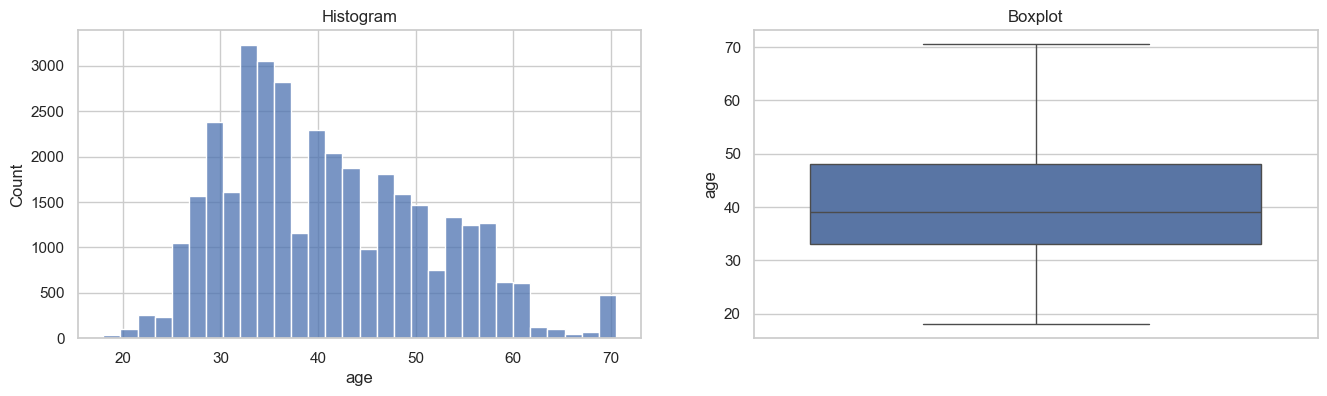

Generating plots for: day


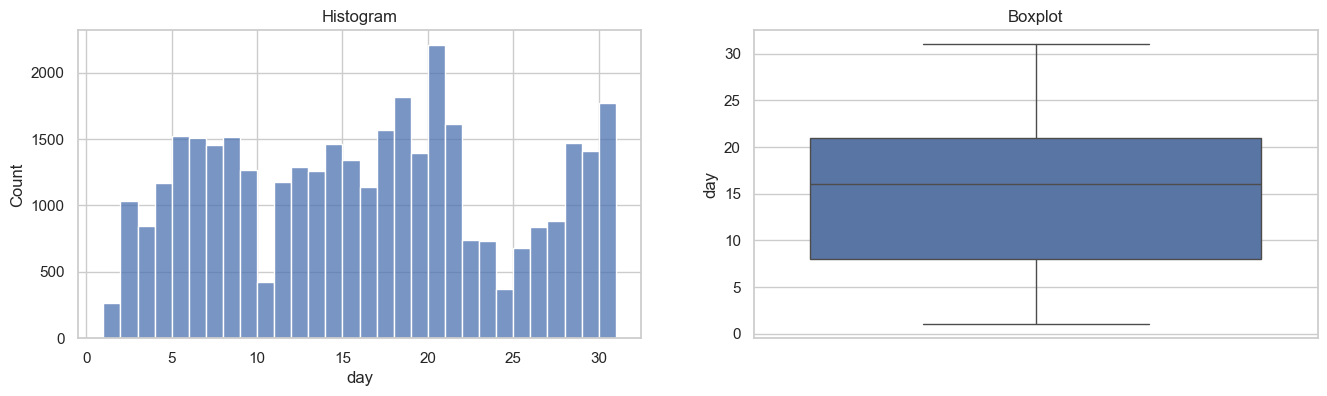

Generating plots for: campaign


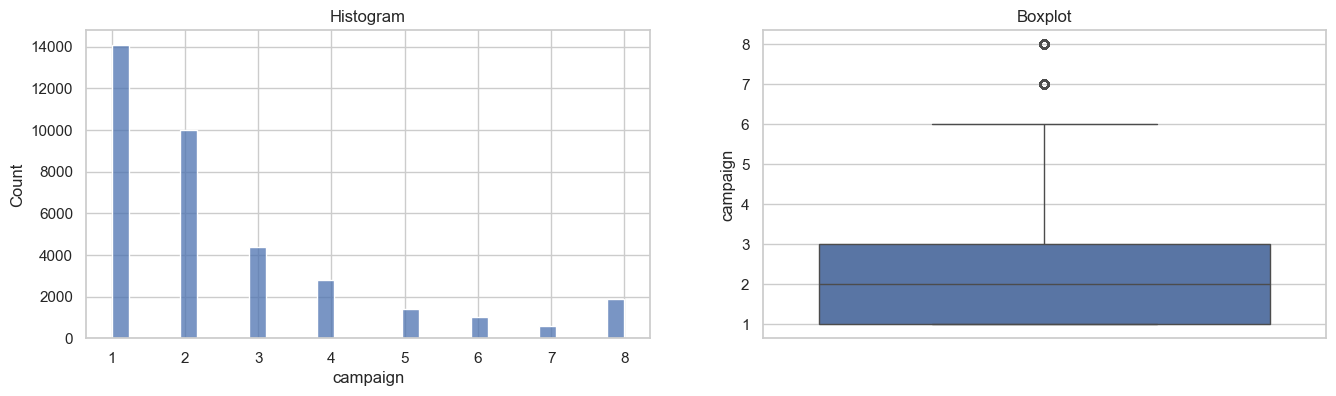

Generating plots for: pdays


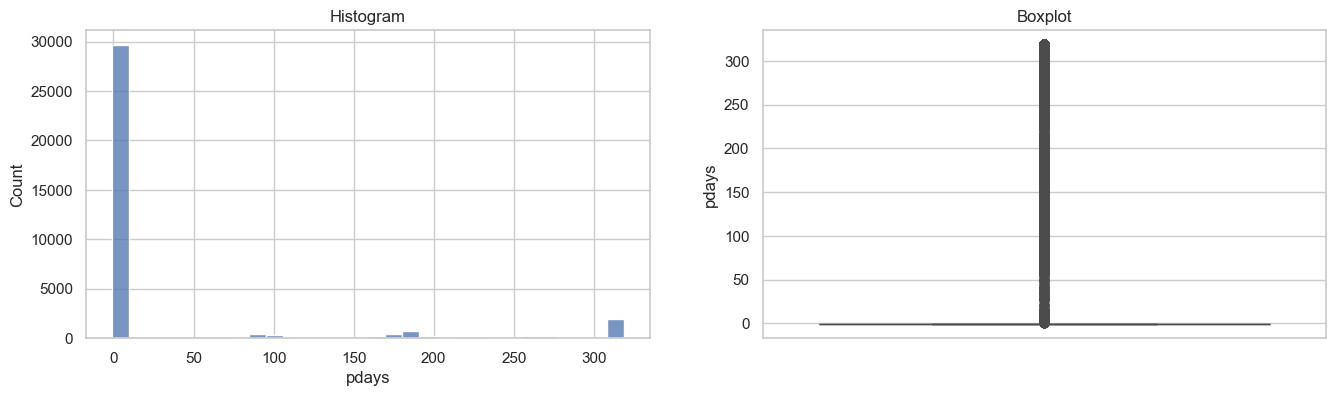

Generating plots for: previous


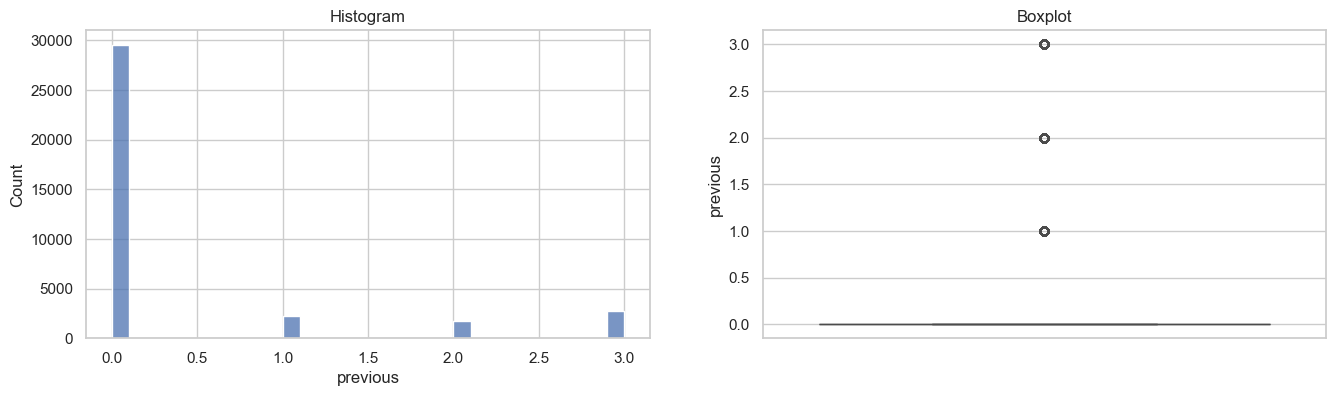

Generating plots for: balance


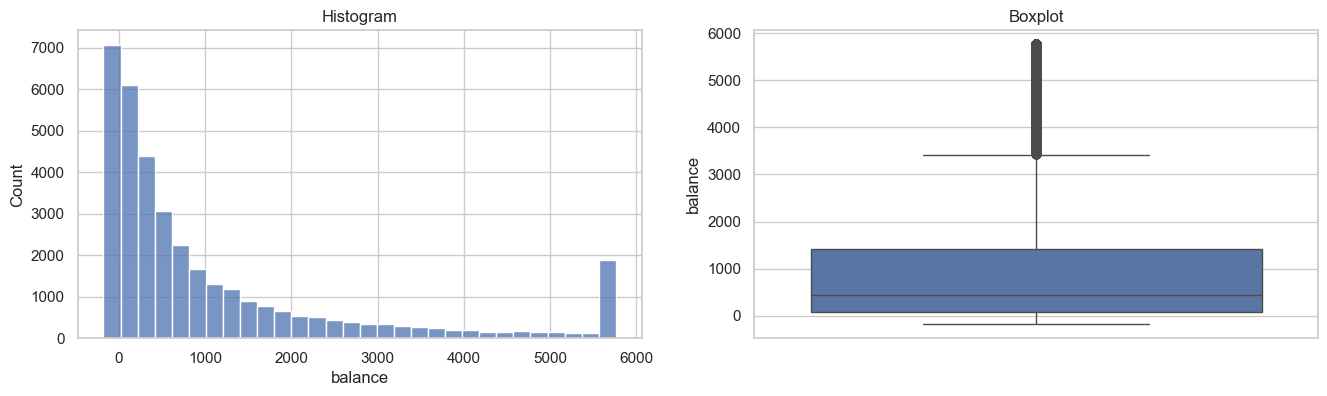

Generating plots for: duration


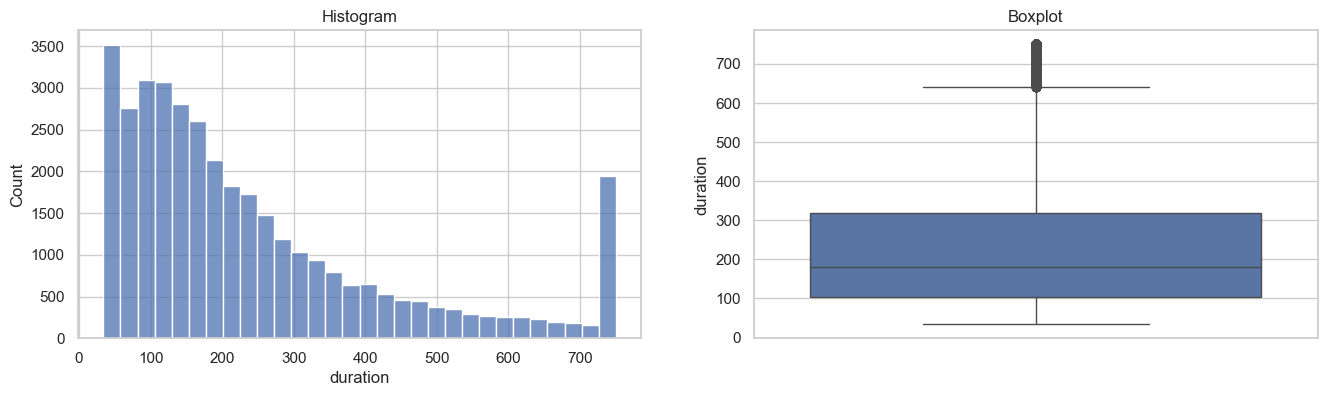

In [374]:
columns_to_plot = num_cols  # Tentukan kolom yang ingin di-plot

# Memanggil fungsi untuk kolom yang ditentukan
for column in columns_to_plot:
    # Periksa apakah kolom ada dalam DataFrame
    if column in X_train.columns:
        # Periksa apakah kolom bertipe numerik atau boolean
        if pd.api.types.is_numeric_dtype(X_train[column]) or pd.api.types.is_bool_dtype(X_train[column]):
            print(f'Generating plots for: {column}')
            diagnostic_plots(X_train, column)
        else:
            print(f'Kolom {column} bukan tipe numerik atau boolean. Skipping.')
    else:
        print(f'Kolom {column} tidak ditemukan dalam DataFrame.')

Setelah melakukan handling outlier, beberapa kolom seperti pdays dan previous tetap memiliki skewness tinggi. Hal ini bisa disebabkan oleh karakteristik data, seperti banyaknya nasabah yang belum pernah dihubungi atau tidak memiliki riwayat kontak.
Namun data yang dilakukan handling outliers menjadi lebih stabil dan konsisten. Kolom yang tadinya sangat skewed kini lebih dekat dengan distribusi normal, sehingga membuat data lebih siap untuk melakukan modeling machine learning.

## **Check Cardinality**

In [375]:
# Membuat function untuk memeriksa cardinality data
def cardinality_check (data : pd.DataFrame, cat_cols : list):
    # tempat penyimpanan nilai
    col_name = []
    n_unique = []
    uniques = []

    for column in cat_cols :
        # simpan nama kolom
        col_name.append(column)

        # simpan jumlah nilai unique
        n_unique.append(data[column].nunique())

        # simpan nilai-nilai unique
        list_unique = list(data[column].unique())
        uniques.append(list_unique)


    df = pd.DataFrame({
        "Nama Kolom" : col_name,
        "Jumlah Unique" : n_unique,
        "Nilai Unique" : uniques
    })
    return df

In [376]:
# Memisahkan kolom kategori
nominal_cols = ['job','marital','default','housing','loan','contact','month','poutcome']
ordinal_cols = ['education']
cat_cols = nominal_cols + ordinal_cols

In [377]:
cardinality_check(X_train, cat_cols)

,Nama Kolom,Jumlah Unique,Nilai Unique
0,job,12,"[management, blue-collar, admin., technician, ..."
1,marital,3,"[married, single, divorced]"
2,default,2,"[no, yes]"
3,housing,2,"[yes, no]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,12,"[may, jun, jul, nov, sep, aug, apr, jan, feb, ..."
7,poutcome,5,"[not contacted before, failure, success, other..."
8,education,4,"[tertiary, secondary, primary, unknown]"


Berdasarkan hasil cardinality check diatas, dapat ditemukan :
- Mayoritas kolom dalam data Bank Telemarketing memiliki cardinality yang rendah hingga sedang, sehingga strategi encoding seperti one-hot encoding atau ordinal encoding bisa digunakan dengan efektif.
- Secara keseluruhan, data Bank Telemarketing ini tidak memiliki masalah cardinality yang terlalu kompleks, sehingga proses encoding seharusnya dapat dilakukan dengan mudah tanpa menambah terlalu banyak kompleksitas pada model.

## **Feature Selection**

Pada data Bank Telemarketing terdiri dari berbagai jenis fitur yang digunakan untuk memprediksi apakah nasabah akan berlangganan deposito berjangka (y) atau tidak. Fitur-fitur pada data tersebut berupa numerik dan kategorikal. Fitur numerik ini bisa dianalisis menggunakan Kendall Tau untuk mengukur kekuatan korelasi terhadap target kategori (y). Sedangkan, fitur kategorikal dianalisis menggunakan Chi-Square Test untuk mengukur apakah ada hubungan signifikan antara kategori variabel dan target kategori (y).

In [378]:
### Uji Kendall's Tau
for col in X_train[num_cols]:
    # if X_train[col].dtype == 'object':  
    #     X_train[col] = X_train[col].astype('category').cat.codes
    
    tau, p_value = stats.kendalltau(X_train[col], y_train)
    print(f"Korelasi Kendall Tau antara kolom {col} dan y_train:")
    print(f"Tau: {tau}, P-value: {p_value}\n")

### Uji Chi-Square 
for col in X_train[cat_cols]:
    # if X_train[col].dtype == 'object':  
        contingency_table = pd.crosstab(X_train[col], y_train)
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"Chi-Square Test antara kolom {col} dan y_train:")
        print(f"Chi2 Statistic: {chi2}, P-value: {p}\n")
        # print(f"Expected Frequencies: \n{expected}\n")

Korelasi Kendall Tau antara kolom age dan y_train:
Tau: -0.008041557718624106, P-value: 0.0648153485654689

Korelasi Kendall Tau antara kolom day dan y_train:
Tau: -0.020844874873202055, P-value: 1.859512043884892e-06

Korelasi Kendall Tau antara kolom campaign dan y_train:
Tau: -0.0759520709532281, P-value: 2.9517242664081684e-57

Korelasi Kendall Tau antara kolom pdays dan y_train:
Tau: 0.14743303490275636, P-value: 4.420930731097452e-188

Korelasi Kendall Tau antara kolom previous dan y_train:
Tau: 0.1650632301758182, P-value: 3.029705104186638e-229

Korelasi Kendall Tau antara kolom balance dan y_train:
Tau: 0.08225592993862214, P-value: 6.220393577298456e-81

Korelasi Kendall Tau antara kolom duration dan y_train:
Tau: 0.2812607635619371, P-value: 0.0

Chi-Square Test antara kolom job dan y_train:
Chi2 Statistic: 626.0149739519686, P-value: 3.801751531711144e-127

Chi-Square Test antara kolom marital dan y_train:
Chi2 Statistic: 160.60468999821396, P-value: 1.3339350467084073e-35


Berdasarkan hasil statistika korelasi dengan Kendall dan Chi Square diatas, ditemukan :
1. Pada kolom duration korelasi dengan target (y_train) sangat signifikan dengan nilai p-value 0.0 dan koefisien Kendall yang cukup tinggi (0.281). Ini menunjukkan bahwa durasi kontak sangat mempengaruhi hasil, sehingga fitur ini sangat penting dalam model.(Namun distribusi data berada banyak pada nilai 0, yang )
2. Kolom previous memiliki korelasi positif yang signifikan dengan target (y_train) dan memiliki p-value yang sangat kecil, menunjukkan bahwa riwayat interaksi sebelumnya adalah indikator penting dalam prediksi.
3. Kolom pdays juga menunjukkan korelasi yang signifikan dengan target, sehingga dapat membantu dalam model prediksi.
4. Pada kolom balance, meskipun korelasinya tidak sebesar duration atau previous, balance tetap memiliki pengaruh signifikan terhadap target berdasarkan p-value yang sangat kecil.
5. Pada kolom campaign, meskipun korelasinya negatif, campaign juga menunjukkan signifikansi statistik yang cukup besar, artinya jumlah kontak kampanye mempengaruhi keputusan pelanggan.
6. Berdasarkan uji Chi-Square pada kolom job, ada hubungan yang sangat signifikan antara jenis pekerjaan dan hasil kampanye, sehingga kolom job adalah kandidat kuat untuk digunakan dalam model.
7. Kolom marital juga menunjukkan signifikansi yang tinggi, sehingga status perkawinan bisa menjadi variabel penting dalam model.
8. Pinjaman rumah pada kolom housing juga berhubungan signifikan dengan hasil kampanye, sehingga perlu dimasukkan dalam model.
9. Pinjaman pribadi juga menunjukkan hubungan signifikan dengan target.
10. Pada kolom month ada pola musiman yang signifikan, sehingga kolom month dapat digunakan untuk menangkap pola musiman dalam hasil kampanye.
11. Hasil kampanye sebelumnya (poutcome) memiliki hubungan yang sangat signifikan dengan target, sehingga ini adalah variabel yang penting untuk dimasukkan dalam model.
12. Tingkat pendidikan (education) menunjukkan hubungan yang signifikan dengan hasil kampanye, sehingga kolom ini juga relevan.

Kolom yang dipertimbangkan :
Pada tahap memeriksa skewness dan outlier, kolom duration, pdays, dan previous memiliki distribusi data yang tidak merata/ hanya berkumpul di suatu titik. 
- Kolom duration, distribusi nilai 0 lebih dominan, jika dimasukkan dalam model, duration cenderung sangat mempengaruhi hasil prediksi karena dapat menyebabkan data leakage. 
- Kolom pdays dan previous terdapat korelasi yang kuat. Jika pdays = -1 (artinya klien tidak pernah dihubungi), maka previous cenderung memiliki nilai 0. Ini menyebabkan redundansi informasi di antara kedua kolom ini. Untuk menghindari multikolinearitas dan redundansi, salah satu dari kedua fitur ini dapat dihapus. Dalam hal ini, kolom previous lebih sering dipertahankan karena memberi informasi konkret tentang jumlah kontak sebelumnya.



Setelah melakukan uji korelasi pada setiap kolom dengan target, kolom-kolom yang dapat dipilih untuk modeling, yaitu :
1. Kolom Demografi seperti age, job, marital, dan education dipertahankan karena faktor demografi sering kali mempengaruhi keputusan keuangan, termasuk preferensi investasi.
2. Kondisi Keuangan Nasabah yang diwakili oleh kolom balance, default, housing, dan loan juga dipilih karena memberikan informasi tentang kemampuan finansial nasabah serta risiko kredit yang mungkin memengaruhi keputusan mereka untuk berinvestasi.
3. Informasi Kontak dan Riwayat Kampanye seperti contact, month, campaign, previous, dan poutcome dipertahankan karena mencerminkan riwayat interaksi nasabah selama kampanye pemasaran. Kolom-kolom ini sangat relevan dalam memahami respons nasabah terhadap pendekatan pemasaran.


Sementara, kolom pdays dan duration tidak dipilih karena potensi bias yang tinggi dan karena keduanya sering kali dipengaruhi oleh informasi yang tidak tersedia sebelum kampanye berjalan.

In [379]:
# Mengambil fitur yang terseleksi
selected_features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan',
    'contact',
    'day',
    'month',
    'campaign',
    'previous',
    'poutcome'
]
# Mengambil kolom yang digunakan untuk modeling
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]
X_inf = X_inference[selected_features]

## **Data Balancing**

Data balancing yang digunakan untuk menghindari data dummy pada model ini dengan teknik undersampling. Penggunaan Random Under Sampler dalam kasus ini bertujuan untuk mengatasi ketidakseimbangan data yang dapat menyebabkan model prediksi menjadi bias dan kurang efektif dalam memprediksi kelas minoritas (yes). Random Under Sampling (RUS) sering kali dipilih karena kecepatannya, dan tidak memiliki asumsi dari teknik undersampling lain. Data pada Bank Telemarketing memiliki lebih dari satu tipe data, teknik RUS tidak memiliki syarat untuk tipe data tertentu.

In [380]:
# Memeriksa balancing data sebelum handling
print(y_train.value_counts())
print(y_test.value_counts())

y
no     31934
yes     4230
Name: count, dtype: int64
y
no     7984
yes    1058
Name: count, dtype: int64


In [381]:
# Implementasi Random Under Sampler 
rus = RandomUnderSampler(random_state=42)
X_train_resample, y_train_resample = rus.fit_resample(X_train1, y_train)

In [382]:
# Memeriksa balancing data setelah handling
print(y_train_resample.value_counts()) 

y
no     4230
yes    4230
Name: count, dtype: int64


In [383]:
y_train_resample.info()

<class 'pandas.core.series.Series'>
Index: 8460 entries, 27376 to 19205
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
8460 non-null   object
dtypes: object(1)
memory usage: 132.2+ KB


Setelah melakukan balancing, datanya akan menyesuaikan kelas minoritas (yes) menjadi 8460 data.

---

# **Model Definition**

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

**Latar Belakang Bagging dalam Algoritma Ensemble** <br>
Bagging, atau Bootstrap Aggregating, adalah salah satu teknik dalam algoritma ensemble yang digunakan untuk meningkatkan performa model prediksi dengan mengurangi varians dan mengatasi masalah overfitting. Teknik ini diperkenalkan oleh Leo Breiman pada tahun 1994 dan sangat berguna dalam mengatasi beberapa masalah yang sering ditemui dalam model prediksi. Bagging membangun beberapa instance dari estimator dasar (misalnya decision tree) pada subset acak dari data pelatihan dan kemudian menggabungkan prediksi dari masing-masing model untuk menghasilkan prediksi akhir.<br>

**Cara Kerja Bagging** <br>
Pengambilan Subset Data:

- Pasting: Mengambil subset acak dari data pelatihan tanpa pengembalian. Metode ini membagi data menjadi subset-subset tanpa menggantikan data yang telah diambil.
- Bagging: Mengambil subset acak dari data pelatihan dengan pengembalian. Ini berarti bahwa beberapa data mungkin muncul lebih dari sekali dalam subset, karena pengambilan dilakukan dengan pengembalian.
- Random Subspaces: Mengambil subset acak dari fitur (bukan sampel) pada data pelatihan. Metode ini berfokus pada penggunaan subset fitur yang berbeda untuk melatih setiap model.
- Random Patches: Mengambil subset acak dari data pelatihan untuk sampel dan fitur sekaligus. Ini merupakan kombinasi dari teknik sampling sampel dan fitur.

Pelatihan Model:
- Model (misalnya, decision tree) dilatih secara terpisah pada setiap subset data yang telah dibuat.

Penggabungan Prediksi:
- Regresi: Menggabungkan hasil prediksi dari semua model dengan cara mengambil rata-rata.
- Klasifikasi: Menggabungkan hasil prediksi dari semua model dengan cara voting mayoritas (kelas yang paling banyak dipilih).<br>

**Parameter Penting dalam Scikit-learn**<br>
Dalam scikit-learn, bagging diterapkan melalui meta-estimator seperti BaggingClassifier untuk klasifikasi dan BaggingRegressor untuk regresi. Beberapa parameter kunci meliputi:
- max_samples: Mengontrol ukuran subset data dalam hal jumlah sampel.
- max_features: Mengontrol ukuran subset fitur.
- bootstrap: Mengatur apakah sampel diambil dengan atau tanpa pengembalian (untuk metode bagging).
- bootstrap_features: Mengatur apakah fitur diambil dengan atau tanpa pengembalian (untuk metode random subspaces).
- Parameter oob_score memungkinkan estimasi akurasi generalisasi dengan menggunakan sampel yang tidak digunakan dalam pelatihan (out-of-bag samples).

**Sumber :**
https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

---

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

**Perbedaan antara Random Forest dan Gradient Boosting**

1. **Parameter dan Kontrol Jumlah Pohon**:
   - n_estimators: Untuk Random Forest, ini mengatur jumlah pohon dalam hutan dan merupakan angka tetap. Untuk Gradient Boosting, parameter yang setara adalah `max_iter`, yang mengatur jumlah iterasi atau pohon yang digunakan dalam model. Namun, jumlah pohon yang dibutuhkan untuk Gradient Boosting dapat bervariasi tergantung pada kriteria penghentian yang digunakan.

2. **Metode Dasar**:
   - Gradient Boosting menggunakan gradient boosting, yang secara iteratif memperbaiki performa model dengan melatih setiap pohon pada gradien negatif dari fungsi kerugian terhadap nilai prediksi yang ada.
   - RF menggunakan metode bagging dan menggabungkan prediksi dari berbagai pohon keputusan dengan voting mayoritas untuk menghasilkan prediksi akhir.

3. **Penggunaan Histogram**:
   - Gradient Boosting menggunakan algoritma berbasis histogram pada nilai fitur yang dikelompokkan (binning). Ini sangat efisien untuk menangani dataset besar (puluhan ribu sampel atau lebih) dengan banyak fitur.
   - RF dalam scikit-learn tidak menggunakan binning, melainkan mengandalkan pembagian eksak, yang bisa menjadi mahal secara komputasi.

4. **Parallelisme dan Waktu Komputasi**:
   - Gradient Boosting sering kali diimplementasikan dengan paralelisme bawaan, yang mempercepat proses pelatihan. 
   - RF juga dapat berjalan di beberapa inti prosesor dengan parameter `n_jobs`, yang memungkinkan eksekusi paralel. Namun, pembagian eksak dapat membuat prosesnya lebih lambat dibandingkan dengan binning yang digunakan oleh Gradient Boosting.

5. **Early Stopping**:
   - Gradient Boosting memiliki opsi early-stopping yang mencegah penambahan pohon yang tidak diperlukan. Algoritma ini menggunakan set out-of-sample untuk menghitung performa generalisasi model pada setiap penambahan pohon. Jika performa generalisasi tidak membaik selama lebih dari `n_iter_no_change` iterasi, penambahan pohon dihentikan.
   - RF tidak memiliki mekanisme early-stopping. Semua pohon yang ditentukan oleh `n_estimators` akan dilatih terlepas dari performa generalisasi.

6. **Komparasi Performa**:
   - Secara umum, model berbasis histogram gradient boosting (Gradient Boosting) sering kali menawarkan trade-off yang lebih baik antara kecepatan pelatihan dan akurasi dibandingkan dengan model Random Forest. Gradient Boosting biasanya memberikan hasil yang lebih baik dalam hal "skor uji vs kecepatan pelatihan".
   - Namun, dalam kasus klasifikasi multikelas dengan banyak kelas, Gradient Boosting mungkin lebih lambat karena melatih satu pohon per kelas pada setiap iterasi boosting. Sebaliknya, pohon dalam Random Forest dirancang untuk menangani masalah multikelas secara alami, yang dapat meningkatkan trade-off kecepatan-akurasi untuk kasus ini.

**Keseluruhan :**
- **Random Forest** lebih sederhana dan sering lebih mudah untuk diterapkan serta tidak memerlukan penyetelan hyperparameter yang rumit.
- **Gradient Boosting** menawarkan kecepatan dan akurasi yang lebih baik pada banyak dataset, namun bisa lebih kompleks dalam implementasinya, terutama untuk masalah klasifikasi multikelas.

**Sumber :**<br>
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_hist_grad_boosting_comparison.html#sphx-glr-auto-examples-ensemble-plot-forest-hist-grad-boosting-comparison-py

---

3. Jelaskan apa yang dimaksud dengan Cross Validation

**Cross-Validation dan Opsi cv**

**Cross-Validation** adalah metode untuk membagi dataset menjadi beberapa bagian (folds) untuk menguji performa model secara lebih adil. Ini membantu dalam menghindari overfitting dan memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

**Opsi Input untuk cv**

1. **Integer (Jumlah Fold)**
   - Definisi: Menentukan jumlah fold dalam K-fold cross-validation. Sebagai contoh, jika cv=5, data akan dibagi menjadi 5 bagian, dan model akan dilatih dan diuji sebanyak 5 kali, setiap kali menggunakan bagian yang berbeda sebagai data uji dan sisa bagian lainnya sebagai data latih.
   - Penggunaan: Jika estimator yang digunakan adalah klasifikator (misalnya, KNeighborsClassifier), maka K-fold akan dilakukan secara stratified, yaitu dengan memastikan proporsi kelas dalam setiap fold sama dengan proporsi kelas dalam dataset asli. Ini penting untuk memastikan bahwa setiap fold representatif dari seluruh data.

2. **Instansi Cross-Validation Splitter**
   - Definisi: Merupakan objek dari kelas yang mengimplementasikan strategi pembagian data, seperti KFold, StratifiedKFold, atau GroupKFold. Splitter ini dapat mengatur bagaimana data dibagi menjadi subset untuk pelatihan dan pengujian.
   - Penggunaan: Ini memungkinkan kontrol yang lebih detail atas cara data dibagi. Misalnya, StratifiedKFold menjaga proporsi kelas yang sama di setiap fold, sedangkan GroupKFold mempertimbangkan kelompok tertentu untuk pembagian data.

3. **Iterable yang Menghasilkan Pembagian Latih/Uji**
   - Definisi: Ini adalah objek yang menghasilkan pasangan indeks untuk data latih dan uji. Misalnya, sebuah iterable dapat berupa daftar tuple yang setiap tuple-nya berisi dua array: satu untuk indeks latih dan satu untuk indeks uji.
   - Penggunaan: Ini memungkinkan penggunaan strategi pembagian data yang lebih kustom atau spesifik.

**Nilai Default dan Validasi**

- Nilai Default: Jika tidak ada nilai cv yang ditentukan, Scikit-learn menggunakan default 5-fold cross-validation. Ini berarti data akan dibagi menjadi 5 bagian, dan model akan diuji secara bergiliran dengan setiap bagian sebagai data uji.

- Validasi dan Interpretasi: Opsi cv yang digunakan divalidasi dan ditafsirkan dengan menggunakan fungsi model_selection.check_cv. Fungsi ini memastikan bahwa nilai cv yang diberikan sesuai dan dapat diterima oleh metode cross-validation yang digunakan.


**Sumber :**
https://scikit-learn.org/stable/glossary.html#term-cv

---

Pada tahap modeling untuk memprediksi nasabah akan berlangganan deposit berjangka atau tidak, akan menggunakan 5 model klasifikasi, yaitu :
1. KNN
2. SVC
3. Decision Tree
4. Random Forest
5. Gradient Boost

Metriks yang digunakan untuk model yang akan dibuat, menggunakan metriks precision. Precision adalah metrik yang mengukur proporsi prediksi positif yang benar-benar positif. Metrik precision menunjukkan seberapa banyak dari nasabah yang diprediksi akan berlangganan deposito berjangka (prediksi positif) yang benar-benar melakukannya. Karena, model ini akan fokus pada nasabah yang berpotensi tinggi untuk berlangganan deposito berjangka. Metriks ini bertujuan untuk mengurangi nilai *False Positive* / prediksi positif yang salah. Penggunaan metriks precision relevan pada model yang akan dibuat karena beberapa alasan :
- False Positive* berarti bank akan menghabiskan sumber daya untuk menargetkan nasabah yang sebenarnya tidak tertarik pada deposito berjangka. Precision yang tinggi akan meminimalkan hal ini, sehingga kampanye pemasaran menjadi lebih efisien.
- Kampanye pemasaran sering kali memiliki biaya yang signifikan, baik dalam bentuk waktu, uang, maupun tenaga. Dengan menggunakan precision sebagai metrik utama, model akan lebih fokus pada prediksi yang benar-benar akurat untuk nasabah yang memiliki kemungkinan tinggi untuk berlangganan.
- Bank dapat mengalokasikan sumber daya pemasaran mereka lebih efektif, menargetkan nasabah yang lebih cenderung memberikan respons positif.
- Dalam kampanye pemasaran, menargetkan nasabah yang salah (false positives) bisa menyebabkan dua masalah: 
    1. Meningkatnya biaya tanpa hasil yang sepadan, dan
    2. Risiko kehilangan kepercayaan nasabah karena mereka merasa ditargetkan dengan produk yang tidak relevan bagi mereka.
- Dengan mengoptimalkan precision, bank dapat memastikan bahwa mereka hanya menargetkan nasabah yang paling relevan, yang meningkatkan kemungkinan keberhasilan kampanye dan menjaga hubungan baik dengan nasabah.
- Precision juga penting dalam membangun strategi pemasaran jangka panjang. Dengan mendapatkan nasabah yang benar-benar tertarik pada produk, bank dapat membangun basis nasabah yang loyal, yang dapat memberikan nilai lebih dalam jangka panjang.

Penggunaan precision sebagai metrik klasifikasi utama dalam memprediksi nasabah akan berlangganan deposit berjangka atau tidak bertujuan untuk memastikan bahwa kampanye pemasaran bank lebih efisien, dengan menargetkan nasabah yang paling mungkin berlangganan deposito berjangka. Ini akan mengoptimalkan penggunaan sumber daya pemasaran, mengurangi biaya yang tidak perlu, dan meningkatkan keberhasilan kampanye secara keseluruhan.

**Menyiapkan Kolom Numerik dan Kategori untuk Dipakai ke dalam Kolom Transformer**

In [384]:
# Kolom numerik, kategorikal (one-hot), dan kategorikal (ordinal)
numerical_features = ['age','day','campaign','previous','balance']
categorical_onehot_features = ['job','marital','default','housing','loan','contact','month','poutcome']
categorical_ordinal_features = ['education']


# Definisikan urutan untuk ordinal encoding pada kolom 'education'
education_order = ['unknown', 'primary', 'secondary', 'tertiary']

---

# **Model KNN**

## **Model Definition**

In [385]:
from sklearn.neighbors import KNeighborsClassifier

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_onehot_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features)
    ])

# Pipeline untuk preprocessing dan model Logistic Regression
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [386]:
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'day', 'campaign',
                                                   'previous', 'balance']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('classifier', KNeighborsClassifier())])

## **Model Training dan Evaluation**

In [387]:
from sklearn.metrics import classification_report, precision_score, make_scorer

# Melatih model train
pipeline_knn.fit(X_train_resample, y_train_resample)

# Prediksi pada data train
y_pred_knn = pipeline_knn.predict(X_train_resample)

# Classification Report 
print("Classification Report :")
print(classification_report(y_train_resample, y_pred_knn))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_knn = cross_val_score(pipeline_knn, X_train_resample, y_train_resample, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_knn)
print("Mean Precision Score : ", cv_scores_knn.mean())
print("Standar Deviasi Precision Score : ", cv_scores_knn.std())


Classification Report :
              precision    recall  f1-score   support

          no       0.74      0.82      0.78      4230
         yes       0.80      0.72      0.76      4230

    accuracy                           0.77      8460
   macro avg       0.77      0.77      0.77      8460
weighted avg       0.77      0.77      0.77      8460

Cross-Validation Precision Scores :  [0.68386243 0.66577896 0.68984701 0.66408269 0.67171717]
Mean Precision Score :  0.6750576528077342
Standar Deviasi Precision Score :  0.010138560482180774


In [388]:
# Melatih model train
pipeline_knn.fit(X_train_resample, y_train_resample)

# Prediksi pada data uji 
y_pred_knn = pipeline_knn.predict(X_test1)

# Classification Report 
print("Classification Report :")
print(classification_report(y_test, y_pred_knn))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_knn = cross_val_score(pipeline_knn, X_test1, y_test, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_knn)
print("Mean Precision Score : ", cv_scores_knn.mean())
print("Standar Deviasi Precision Score : ", cv_scores_knn.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.93      0.71      0.81      7984
         yes       0.22      0.61      0.32      1058

    accuracy                           0.70      9042
   macro avg       0.58      0.66      0.57      9042
weighted avg       0.85      0.70      0.75      9042

Cross-Validation Precision Scores :  [0.55405405 0.52054795 0.42372881 0.48387097 0.6       ]
Mean Precision Score :  0.5164403561121582
Standar Deviasi Precision Score :  0.06011667294357438


Perbandingan model KNN antara data train dan test diatas adalah sebagai berikut :

**1. Precision "Yes" pada Data Train:**
- **Nilai Precision: 0.80** : Nilai precision yang cukup tinggi (0.80) menunjukkan bahwa ketika model memprediksi kelas "yes" pada data train, 80% dari prediksi tersebut benar. Ini berarti bahwa kesalahan prediksi di mana "no" diprediksi sebagai "yes" relatif sedikit pada data train. 
- Model bekerja dengan cukup baik untuk kelas "yes" pada data train, dengan kemampuan yang baik dalam memprediksi pelanggan yang benar-benar berlangganan deposito.

**2. Precision "Yes" pada Data Test:**
- **Nilai Precision: 0.22** : Nilai precision untuk kelas "yes" pada data test jauh lebih rendah, hanya 0.22. Ini berarti bahwa hanya 22% dari prediksi "yes" pada data test yang benar, sementara 78% sisanya adalah kesalahan.
- Nilai precision yang sangat rendah pada data test menunjukkan bahwa model kesulitan dalam memprediksi kelas "yes" dengan benar di data baru yang belum pernah dilihat sebelumnya. Sebagian besar prediksi "yes" ternyata salah, yang menandakan bahwa model cenderung memberikan prediksi positif palsu (false positives) untuk kelas "yes".

**3. Perbandingan Precision "Yes" Antara Data Train dan Data Test:**
- Pada data train, precision untuk kelas "yes" cukup tinggi (0.80), menunjukkan bahwa model bisa memprediksi pelanggan yang benar-benar berlangganan deposito dengan baik.
- Namun, pada data test, precision untuk kelas "yes" turun drastis menjadi 0.22. Hal ini menunjukkan bahwa model mengalami **overfitting**, di mana performa yang baik di data latih tidak dapat digunakan pada data baru. Model tidak mampu menangani kasus "yes" secara efektif pada data test.


**4. Potensi Penyebab**:
- **Imbalance Kelas**: Ketidakseimbangan kelas dapat menjadi salah satu alasan mengapa precision untuk "yes" sangat rendah pada data test. Kelas "yes" jauh lebih jarang dibandingkan dengan "no", model cenderung memberikan lebih banyak prediksi positif palsu.
- **Overfitting**: Model tampaknya terlalu cocok dengan pola spesifik pada data train, tetapi gagal menggeneralisasi pola tersebut ke data test. Ini dapat terjadi karena model lebih fokus pada kelas "no", yang mungkin lebih dominan.

# **Model SVC**

## **Model Definition**

In [389]:
from sklearn.svm import SVC

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_onehot_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features)
    ])

# Pipeline untuk preprocessing dan model Logistic Regression
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=11))
])

In [390]:
pipeline_svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'day', 'campaign',
                                                   'previous', 'balance']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('classifier', SVC(random_state=11))])

## **Model Training dan Evaluation**

In [391]:
# Melatih model train
pipeline_svc.fit(X_train_resample, y_train_resample)

# Prediksi pada data train 
y_pred_svc = pipeline_svc.predict(X_train_resample)

# Classification Report 
print("Classification Report :")
print(classification_report(y_train_resample, y_pred_svc))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_svc = cross_val_score(pipeline_svc, X_train_resample, y_train_resample, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_svc)
print("Mean Precision Score : ", cv_scores_svc.mean())
print("Standar Deviasi Precision Score : ", cv_scores_svc.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.67      0.88      0.76      4230
         yes       0.83      0.56      0.67      4230

    accuracy                           0.72      8460
   macro avg       0.75      0.72      0.71      8460
weighted avg       0.75      0.72      0.71      8460

Cross-Validation Precision Scores :  [0.80140598 0.78883072 0.80286738 0.79759863 0.81271478]
Mean Precision Score :  0.8006834957719742
Standar Deviasi Precision Score :  0.007746584686208317


In [392]:
# Melatih model train
pipeline_svc.fit(X_train_resample, y_train_resample)

# Prediksi pada data uji 
y_pred_svc = pipeline_svc.predict(X_test1)

# Classification Report 
print("Classification Report :")
print(classification_report(y_test, y_pred_svc))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_svc = cross_val_score(pipeline_svc, X_test1, y_test, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_svc)
print("Mean Precision Score : ", cv_scores_svc.mean())
print("Standar Deviasi Precision Score : ", cv_scores_svc.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.93      0.86      0.89      7984
         yes       0.33      0.54      0.41      1058

    accuracy                           0.82      9042
   macro avg       0.63      0.70      0.65      9042
weighted avg       0.86      0.82      0.84      9042

Cross-Validation Precision Scores :  [0.65753425 0.66101695 0.61764706 0.625      0.67857143]
Mean Precision Score :  0.6479539366245686
Standar Deviasi Precision Score :  0.023001067352567642


Perbandingan model SVC antara data train dan test diatas adalah sebagai berikut :
- Precision pada Data Train vs Test: Terdapat penurunan besar pada nilai precision untuk kelas "yes" dari data train (0.83) ke data test (0.33). Ini menunjukkan masalah **overfitting** yang signifikan, di mana model bekerja sangat baik pada data latih tetapi gagal untuk menghasilkan performa yang baik pada data baru.
- Cross-Validation: Pada data train, hasil cross-validation untuk precision cukup stabil dan tinggi (mean 0.80). Namun, hasil cross-validation pada data test menunjukkan precision yang lebih rendah (mean 0.65) dengan standar deviasi yang lebih besar. Ini menandakan bahwa model mungkin tidak bekerja dengan baik pada data baru yang berbeda atau pada data dengan distribusi yang bervariasi.
- Meskipun hasil cross-validation pada data train menunjukkan performa yang cukup baik dan stabil, penurunan mean precision dan peningkatan standar deviasi pada data test menunjukkan adanya penurunan performa dan ketidakstabilan dalam menghadapi data yang tidak dilihat oleh model selama pelatihan. Ini mungkin mengindikasikan perlunya perbaikan model seperti penanganan overfitting atau modifikasi hyperparameter.

# **Model Decision Tree**

## **Model Definition**

In [393]:
from sklearn.tree import DecisionTreeClassifier

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_onehot_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features)
    ])

# Pipeline untuk preprocessing dan model Logistic Regression
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=11))
])

In [394]:
pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'day', 'campaign',
                                                   'previous', 'balance']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('classifier', DecisionTreeClassifier(random_state=11))])

## **Model Training dan Evaluation**

In [395]:
# Melatih model train
pipeline_dt.fit(X_train_resample, y_train_resample)

# Prediksi pada data train 
y_pred_dt = pipeline_dt.predict(X_train_resample)

# Classification Report 
print("Classification Report :")
print(classification_report(y_train_resample, y_pred_dt))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_dt = cross_val_score(pipeline_dt, X_train_resample, y_train_resample, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_dt)
print("Mean Precision Score : ", cv_scores_dt.mean())
print("Standar Deviasi Precision Score : ", cv_scores_dt.std())

Classification Report :
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4230
         yes       1.00      1.00      1.00      4230

    accuracy                           1.00      8460
   macro avg       1.00      1.00      1.00      8460
weighted avg       1.00      1.00      1.00      8460

Cross-Validation Precision Scores :  [0.60585586 0.62211422 0.63221154 0.63265306 0.63015312]
Mean Precision Score :  0.6245975586285957
Standar Deviasi Precision Score :  0.01011085060527331


In [396]:
# Melatih model train
pipeline_dt.fit(X_train_resample, y_train_resample)

# Prediksi pada data uji 
y_pred_dt = pipeline_dt.predict(X_test1)

# Classification Report 
print("Classification Report :")
print(classification_report(y_test, y_pred_dt))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_dt = cross_val_score(pipeline_dt, X_test1, y_test, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_dt)
print("Mean Precision Score : ", cv_scores_dt.mean())
print("Standar Deviasi Precision Score : ", cv_scores_dt.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.92      0.63      0.75      7984
         yes       0.18      0.61      0.28      1058

    accuracy                           0.63      9042
   macro avg       0.55      0.62      0.51      9042
weighted avg       0.84      0.63      0.69      9042

Cross-Validation Precision Scores :  [0.27586207 0.28205128 0.26141079 0.28389831 0.28806584]
Mean Precision Score :  0.27825765762093735
Standar Deviasi Precision Score :  0.009294781879287228


Perbandingan model Decision Tree antara data train dan test diatas adalah sebagai berikut :

- Precision pada Data Train vs Test: Terdapat perbedaan yang sangat signifikan dalam nilai precision untuk kelas "yes" antara data train (1.00) dan data test (0.18). Precision pada data train menunjukkan nilai sempurna, yang sangat mencerminkan masalah **overfitting**. Model bekerja dengan sangat baik pada data latih tetapi gagal menghasilkan performa yang memadai pada data baru, yang terlihat dari precision yang sangat rendah pada data test.
- Cross-Validation: Pada data train, hasil cross-validation untuk precision cukup stabil dengan nilai mean sekitar 0.62, yang lebih rendah dari nilai precision pada data train (1.00). Ini memberikan pandangan yang lebih realistis tentang performa model pada data train. Namun, hasil cross-validation pada data test menunjukkan precision yang lebih rendah (mean 0.28), dengan standar deviasi yang kecil. Meskipun stabil, precision pada data test ini menunjukkan bahwa model mungkin tidak bekerja dengan baik pada data baru yang berbeda atau pada data dengan distribusi yang bervariasi.
- Meskipun hasil cross-validation pada data train menunjukkan performa yang cukup baik dan stabil, penurunan yang drastis pada precision di data test dan hasil cross-validation pada data test menunjukkan adanya penurunan performa yang signifikan dan ketidakmampuan model dalam menghadapi data yang tidak terlihat selama pelatihan. 

# **Model Random Forest**

## **Model Definition**

In [397]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_onehot_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features)
    ])

# Pipeline untuk preprocessing dan model Logistic Regression
pipeline_ranfor = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=11))
])

In [398]:
pipeline_ranfor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'day', 'campaign',
                                                   'previous', 'balance']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('classifier', RandomForestClassifier(random_state=11))])

## **Model Training dan Evaluation**

In [399]:
# Melatih model train
pipeline_ranfor.fit(X_train_resample, y_train_resample)

# Prediksi pada data train 
y_pred_ranfor = pipeline_ranfor.predict(X_train_resample)

# Classification Report 
print("Classification Report :")
print(classification_report(y_train_resample, y_pred_ranfor))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_ranfor = cross_val_score(pipeline_ranfor, X_train_resample, y_train_resample, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_ranfor)
print("Mean Precision Score : ", cv_scores_ranfor.mean())
print("Standar Deviasi Precision Score : ", cv_scores_ranfor.std())

Classification Report :
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4230
         yes       1.00      1.00      1.00      4230

    accuracy                           1.00      8460
   macro avg       1.00      1.00      1.00      8460
weighted avg       1.00      1.00      1.00      8460

Cross-Validation Precision Scores :  [0.73642384 0.73201693 0.73134328 0.74788732 0.74320652]
Mean Precision Score :  0.7381755791142622
Standar Deviasi Precision Score :  0.006439040879448729


In [400]:
# Melatih model train
pipeline_ranfor.fit(X_train_resample, y_train_resample)

# Prediksi pada data uji 
y_pred_ranfor = pipeline_ranfor.predict(X_test1)

# Classification Report 
print("Classification Report :")
print(classification_report(y_test, y_pred_ranfor))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_ranfor = cross_val_score(pipeline_ranfor, X_test1, y_test, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_ranfor)
print("Mean Precision Score : ", cv_scores_ranfor.mean())
print("Standar Deviasi Precision Score : ", cv_scores_ranfor.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.94      0.77      0.85      7984
         yes       0.27      0.63      0.38      1058

    accuracy                           0.76      9042
   macro avg       0.61      0.70      0.61      9042
weighted avg       0.86      0.76      0.79      9042

Cross-Validation Precision Scores :  [0.63855422 0.63636364 0.54794521 0.53968254 0.66153846]
Mean Precision Score :  0.6048168119863118
Standar Deviasi Precision Score :  0.050650988538307656


Perbandingan model Random Forest antara data train dan test diatas adalah sebagai berikut :
Perbandingan model Random Forest antara data train dan test di atas adalah sebagai berikut:

- Precision pada Data Train vs Test: Pada data train, precision untuk kelas "yes" mencapai nilai sempurna (1.00). Ini menunjukkan bahwa model dapat memprediksi semua sampel kelas "yes" dengan sangat baik tanpa kesalahan. Namun, pada data test, precision untuk kelas "yes" menurun drastis menjadi 0.27. Ini menunjukkan bahwa model yang sangat baik pada data train mengalami kesulitan dalam memprediksi kelas "yes" dengan akurasi tinggi pada data test. Penurunan yang signifikan ini menunjukkan adanya **overfitting**, di mana model terlalu sesuai dengan data train dan tidak dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat.

- Cross-Validation: Pada data train, hasil cross-validation untuk precision cukup stabil dan tinggi dengan mean sekitar 0.74. Standar deviasi yang kecil (0.006) menunjukkan bahwa model memberikan hasil yang konsisten pada berbagai subset data train, walaupun hasil ini masih lebih rendah dibandingkan nilai precision keseluruhan pada data train (1.00). Pada data test, hasil cross-validation menunjukkan precision yang lebih rendah dengan mean sekitar 0.60 dan standar deviasi yang lebih tinggi (0.05). Ini menandakan bahwa performa model pada data test tidak sebaik performanya pada data train, dan ada ketidakstabilan dalam prediksi model terhadap data test, terutama untuk kelas "yes".

- Precision yang sangat tinggi pada data train (1.00) dan penurunan yang drastis pada data test (0.27) menunjukkan bahwa model Random Forest mengalami **overfitting**. Model mempelajari detail dari data train dengan sangat baik namun gagal mengeneralisasi saat diberikan data baru. Meskipun cross-validation pada data train menunjukkan performa yang stabil dan tinggi, hasil cross-validation pada data test yang lebih rendah dan memiliki standar deviasi yang lebih besar menunjukkan adanya penurunan performa dan ketidakstabilan ketika model dihadapkan dengan data baru. Ini menandakan bahwa model Random Forest memerlukan penyesuaian lebih lanjut, seperti tuning hyperparameter atau penggunaan teknik regularisasi, untuk meningkatkan generalisasi dan performa pada data yang tidak dilihat selama pelatihan.

# **Model Boosting**

## **Model Definition**

In [401]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_onehot_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features)
    ])

# Pipeline untuk preprocessing dan model Logistic Regression
pipeline_graboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=11))
])

In [402]:
pipeline_graboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'day', 'campaign',
                                                   'previous', 'balance']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('classifier', GradientBoostingClassifier(random_state=11))])

## **Model Training dan Evaluation**

In [403]:
# Melatih model train
pipeline_graboost.fit(X_train_resample, y_train_resample)

# Prediksi pada data train 
y_pred_graboost = pipeline_graboost.predict(X_train_resample)

# Classification Report 
print("Classification Report :")
print(classification_report(y_train_resample, y_pred_graboost))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_graboost = cross_val_score(pipeline_graboost, X_train_resample, y_train_resample, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_graboost)
print("Mean Precision Score : ", cv_scores_graboost.mean())
print("Standar Deviasi Precision Score : ", cv_scores_graboost.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.69      0.85      0.76      4230
         yes       0.81      0.63      0.70      4230

    accuracy                           0.74      8460
   macro avg       0.75      0.74      0.73      8460
weighted avg       0.75      0.74      0.73      8460

Cross-Validation Precision Scores :  [0.7748538  0.78193146 0.76617647 0.79420732 0.78603945]
Mean Precision Score :  0.7806417013446411
Standar Deviasi Precision Score :  0.00956627240052428


In [404]:
# Melatih model train
pipeline_graboost.fit(X_train_resample, y_train_resample)

# Prediksi pada data uji 
y_pred_graboost = pipeline_graboost.predict(X_test1)

# Classification Report 
print("Classification Report :")
print(classification_report(y_test, y_pred_graboost))

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Cross-Validation Score 
cv_scores_graboost = cross_val_score(pipeline_graboost, X_test1, y_test, cv=5, scoring=precision_scorer)
print("Cross-Validation Precision Scores : ", cv_scores_graboost)
print("Mean Precision Score : ", cv_scores_graboost.mean())
print("Standar Deviasi Precision Score : ", cv_scores_graboost.std())

Classification Report :
              precision    recall  f1-score   support

          no       0.94      0.83      0.88      7984
         yes       0.31      0.60      0.41      1058

    accuracy                           0.80      9042
   macro avg       0.63      0.71      0.65      9042
weighted avg       0.87      0.80      0.82      9042

Cross-Validation Precision Scores :  [0.6744186  0.5890411  0.61428571 0.56       0.64516129]
Mean Precision Score :  0.6165813410299738
Standar Deviasi Precision Score :  0.04031661127128928


Perbandingan model Gradient Boosting antara data train dan test diatas adalah sebagai berikut :

- Precision pada Data Train vs Test: Pada data train, precision untuk kelas "yes" mencapai 0.81. Ini menunjukkan bahwa model mampu memprediksi kelas "yes" dengan tingkat akurasi yang cukup baik pada data train. Precision ini cukup tinggi, meskipun tidak sempurna, dan menunjukkan bahwa model Gradient Boosting memiliki kemampuan yang baik untuk membedakan antara kelas "yes" dan "no" pada data latihannya. Pada data test, precision untuk kelas "yes" turun secara signifikan menjadi 0.31. Penurunan ini menunjukkan bahwa model tidak mampu mempertahankan performanya saat dihadapkan dengan data yang belum pernah dilihat sebelumnya, meskipun masih lebih baik dari sekadar tebakan acak. Penurunan precision ini menunjukkan bahwa model mungkin mengalami **overfitting**, meskipun tidak seburuk pada beberapa model lainnya.

- Cross-Validation: Hasil cross-validation pada data train menunjukkan precision yang relatif konsisten dan tinggi dengan mean sekitar 0.78. Standar deviasi yang kecil (0.009) menunjukkan bahwa model menghasilkan hasil yang stabil di berbagai subset data train, mendekati performa keseluruhan pada data train. Pada data test, hasil cross-validation menunjukkan precision yang lebih rendah dengan mean sekitar 0.62 dan standar deviasi yang lebih besar (0.040). Ini menunjukkan bahwa model tidak hanya memiliki performa yang lebih rendah pada data test, tetapi juga menunjukkan ketidakstabilan dalam menghadapi variasi data yang berbeda.

- Penurunan precision dari 0.81 pada data train menjadi 0.31 pada data test menunjukkan bahwa model Gradient Boosting mengalami overfitting, meskipun tidak sepenuhnya dramatis. Model bekerja lebih baik pada data yang dilatih tetapi kesulitan dalam mengeneralisasi pada data baru. Meskipun cross-validation pada data train menunjukkan performa yang cukup stabil dan tinggi, hasil cross-validation pada data test lebih rendah dan memiliki standar deviasi yang lebih besar, menunjukkan penurunan performa dan ketidakstabilan pada data baru. Ini mengindikasikan bahwa model Gradient Boosting memerlukan penyesuaian lebih lanjut, seperti optimasi hyperparameter atau penggunaan teknik regularisasi tambahan untuk meningkatkan generalisasi dan performa pada data yang tidak dilihat selama pelatihan.

# **Tuning Model SVC**

Melakukan tuning pada model sangat penting untuk mengatasi overfitting, meningkatkan generalisasi, dan memastikan bahwa model mampu menangani variasi data baru dengan performa yang stabil. Tuning membantu menemukan hyperparameter optimal yang memungkinkan model bekerja dengan baik tidak hanya pada data yang dilatih tetapi juga pada data baru yang belum pernah dilihat sebelumnya. Model yang dilakukan tuning menggunakan model SVC, karena rentang akurasi pada data train dan test tidak begitu jauh dan hasil mean precision score pada data train masih terlihat normal yaitu 0.82 menggunakan cross validation.

In [405]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score


# Definisikan grid dari hyperparameter untuk dituning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__degree': [2, 3]  # Hanya relevan untuk 'poly' kernel
}

# Tentukan custom scorer untuk precision dengan label 'yes' sebagai positif
precision_scorer = make_scorer(precision_score, pos_label='yes')

# Lakukan Grid Search
random_search_svc = RandomizedSearchCV(pipeline_svc, param_grid, cv=5, scoring=precision_scorer, n_jobs=-1, verbose=2)

# Fit model pada data yang telah diresample
random_search_svc.fit(X_train_resample, y_train_resample)

# Tampilkan hasil terbaik
print("Best Parameters:", random_search_svc.best_params_)
print("Best Precision Score:", random_search_svc.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__degree': 3, 'classifier__C': 10}
Best Precision Score: 0.8017374612840461


In [406]:
# Prediksi pada data train dengan model terbaik
best_model_svc = random_search_svc.best_estimator_
y_pred_best_svc = best_model_svc.predict(X_train_resample)

# Classification Report untuk model terbaik
print("Classification Report (Best Model):")
print(classification_report(y_train_resample, y_pred_best_svc))

Classification Report (Best Model):
              precision    recall  f1-score   support

          no       0.66      0.89      0.76      4230
         yes       0.83      0.55      0.66      4230

    accuracy                           0.72      8460
   macro avg       0.74      0.72      0.71      8460
weighted avg       0.74      0.72      0.71      8460



In [407]:
# Prediksi pada data train dengan model terbaik
best_model_svc = random_search_svc.best_estimator_
y_pred_best_svc = best_model_svc.predict(X_test1)

# Classification Report untuk model terbaik
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best_svc))

Classification Report (Best Model):
              precision    recall  f1-score   support

          no       0.93      0.86      0.90      7984
         yes       0.34      0.53      0.41      1058

    accuracy                           0.82      9042
   macro avg       0.64      0.70      0.66      9042
weighted avg       0.86      0.82      0.84      9042



Perbandingan model SVC dengan tuning antara data train dan test diatas adalah sebagai berikut :

- Precision pada Data Train vs Test: Precision untuk kelas "yes" pada data train adalah 0.83. Ini menunjukkan bahwa model yang telah dituning cukup baik dalam mengidentifikasi nasabah yang akan berlangganan deposito berjangka dari data latihannya. Precision ini cukup tinggi, yang berarti model mampu memberikan prediksi yang relatif akurat untuk kelas "yes" pada data yang telah dilihatnya selama pelatihan. Precision untuk kelas "yes" pada data test turun menjadi 0.34. Ini menunjukkan bahwa meskipun tuning membantu meningkatkan performa pada data train, model masih mengalami **overfitting** di mana performanya pada data test tidak sebaik performanya pada data train.
- Terdapat penurunan yang cukup besar pada precision untuk kelas "yes" dari data train (0.83) ke data test (0.34), yang menunjukkan adanya masalah **overfitting**. Meskipun model bekerja cukup baik pada data latihannya, performanya menurun signifikan saat diuji pada data baru. Meskipun tuning meningkatkan performa pada data train, peningkatan ini datang dengan trade-off, yaitu menurunnya precision pada data test. Ini menunjukkan bahwa model mungkin terlalu sesuai dengan data latihannya dan tidak cukup generalisasi.
- Hasil ini menunjukkan bahwa meskipun tuning dapat membantu meningkatkan performa, model masih memerlukan peningkatan lebih lanjut, seperti menggunakan lebih banyak data atau mengadopsi metode regularisasi yang lebih kuat untuk mengurangi **overfitting** dan meningkatkan performa pada data yang tidak terlihat. 

# **Pengambilan Kesimpulan**

Hasil model KNN, SVC, Decision Tree, Random Forest, Gradient Boosting, dan Tuning SVC untuk memprediksi apakah nasabah akan berlangganan deposito berjangka atau tidak adalah sebagai berikut :
| Model            | Mean Cross Val Train | Test  |
|------------------|-----------------|-------|
| KNN              | 0.67            | 0.22  |
| SVC              | 0.80            | 0.33  |
| Decision Tree    | 0.62            | 0.18  |
| Random Forest    | 0.73            | 0.27  |
| Gradient Boosting| 0.78            | 0.31  |
| Tuning SVC       | 0.83            | 0.34  |

Kelima model mengalami penurunan precision yang signifikan dari data train ke data test, yang menunjukkan masalah overfitting. Random Forest dan Gradient Boosting: Kedua model ini juga menunjukkan performa yang cukup baik dalam hal precision, tetapi masih mengalami penurunan performa pada data test. KNN dan Decision Tree: Kedua model ini menunjukkan performa yang tidak bagus dalam hal precision pada data test, mengindikasikan bahwa model tersebut tidak cocok untuk masalah yang dihadapi tanpa penyesuaian atau tuning lebih lanjut. Pada model tuning SVC, meskipun masih ada peningkatan precision pada data train, namun tetap terjadi penurunan yang signifikan pada data test setelah melakukan pencarian tuning.
Model mengalami overfitting dapat disebabkan dari data imbalance, dan kualitas data yang tidak bagus. Untuk meningkatkan performa model dan mengurangi overfit, dapat melakukan hyperparameter tuning setiap model, peningkatan kualitas data dengan melakukan eksplorasi serta feature creation lebih lanjut untuk menciptakan fitur yang lebih informatif dan relevan untuk model, dan melakukan evaluasi model lain yang belum dicoba.


Berdasarkan hasil analisis model machine learning untuk memprediksi apakah nasabah akan berlangganan deposito berjangka atau tidak,  model yang ada saat ini tidak memenuhi kriteria akurasi 70% untuk memprediksi apakah nasabah akan berlangganan deposito berjangka atau tidak. Oleh karena itu, perlu dilakukan pengembangan lebih lanjut.

# **Model Saving**

Dari hasil metriks precision yang digunakan dan tuning model yang dilakukan pada model terbaik (SVC). Tetap tidak menunjukkan perubahan yang lebih baik, model yang sudah dituning masih tergolong underfit. Oleh karena itu model yang akan dipakai untuk data inference menggunakan model default SVC.

In [408]:
# # Menyimpan pipeline dengan pickle
# with open('pipeline_svc.pkl', 'wb') as file_1:
#     pickle.dump(pipeline_svc, file_1)

In [409]:
# # Menyimpan data inference ke csv
# X_inf.to_csv('X_inf.csv', index=False)

# **Model Inference**

Di notebook : PIM2_Inf_Intan.ipynb